# Simulate RbCs interaction

15 December 2025

Santi

In [1]:
# import two_atom_interaction.py
from two_atom_interaction import *
# keep track of time
import time

## RbCs

Computed C6: 22.718170248218396 GHz·μm^6
C6 (Rb 60S - Cs 67S) = -22.718 GHz·μm^6
Computed C6: 39.51790110020008 GHz·μm^6
C6 (Rb 61S - Cs 67S) = -39.518 GHz·μm^6
Computed C6: 82.37509410069528 GHz·μm^6
C6 (Rb 62S - Cs 67S) = -82.375 GHz·μm^6
Computed C6: -21.88849923752974 GHz·μm^6
C6 (Rb 63S - Cs 67S) = 21.888 GHz·μm^6
Computed C6: 385.054808932469 GHz·μm^6
C6 (Rb 64S - Cs 67S) = -385.055 GHz·μm^6
Computed C6: -807.111287433502 GHz·μm^6
C6 (Rb 65S - Cs 67S) = 807.111 GHz·μm^6
Computed C6: -406.0489430331195 GHz·μm^6
C6 (Rb 66S - Cs 67S) = 406.049 GHz·μm^6
Computed C6: -688.587731227293 GHz·μm^6
C6 (Rb 67S - Cs 67S) = 688.588 GHz·μm^6
Computed C6: 26398.927934765587 GHz·μm^6
C6 (Rb 68S - Cs 67S) = -26398.928 GHz·μm^6
Computed C6: 1619.878667289649 GHz·μm^6
C6 (Rb 69S - Cs 67S) = -1619.879 GHz·μm^6
Computed C6: 298.73841699971 GHz·μm^6
C6 (Rb 70S - Cs 67S) = -298.738 GHz·μm^6


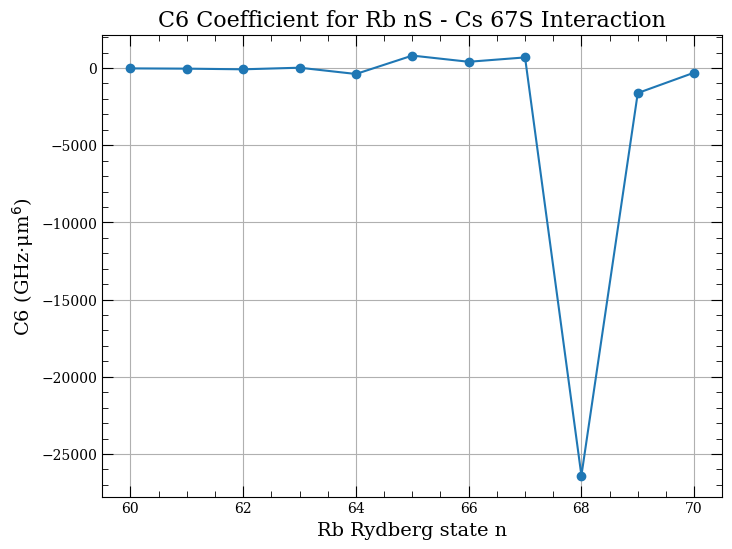

In [15]:
# plotting C6 coefficient calculation for various rydberg states of Rb (fix Cs)

Cs_state = 67
Rb_states = np.linspace(60, 70, 11, dtype=int)  # n=60 to 70
C6_values = []

for n_Rb in Rb_states:
    cfg_temp = ExperimentConfig(
        atom1 = Rubidium(),
        mass_atom1 = Rubidium().mass,
        n_atom1 = n_Rb,  # Rb Rydberg n
        wavelength_nm_atom1 = 700,  # Rb tweezer wavelength

        n_atom2 = Cs_state,  # Cs Rydberg n
    )
    start_time = time.time()
    c6_temp = compute_c6_atom1_atom2_rad_per_s_um6(cfg_temp, progress=True)
    C6_values.append(c6_temp)
    # print(f"C6 (Na {n_Na}S - Cs {Cs_state}S) = {c6_temp:.3e} rad/s·μm^6")
    print("C6 (Rb %dS - Cs %dS) = %.3f GHz·μm^6" % (n_Rb, Cs_state, c6_temp / (2*np.pi*1e9)))
    # print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

# plot C6 vs Rb n
plt.figure(figsize=(8,6))
# plot sign of c6 * log(abs(c6))
# plt.plot(Rb_states, np.sign(C6_values) * np.log(np.abs(np.array(C6_values)/(2*np.pi*1e9))), marker='o')
plt.plot(Rb_states, np.array(C6_values)/(2*np.pi*1e9), marker='o')
plt.xlabel("Rb Rydberg state n", fontsize=14)
plt.ylabel("C6 (GHz·μm$^6$)", fontsize=14)
plt.title(f"C6 Coefficient for Rb nS - Cs {Cs_state}S Interaction", fontsize=16)
# log scale y-axis
plt.grid()
plt.show()

In [2]:
# first checking without squeezing what is the position and momentum spread
pixel_to_um = 1 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    atom1 = Rubidium(),
    mass_atom1 = Rubidium().mass,
    n_atom1 = 67,  # Rb Rydberg n
    wavelength_nm_atom1 = 816,  # Rb tweezer wavelength

    n_atom2 = 67,  # Cs Rydberg n

    R_mean_um = 5.0 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = (1)*1e6,  # Rb Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg
    t_pi_atom2_us = 1 / (2*1e6) * 1e6, # time to do pi pulse on atom2 (us)

    Delta_scan_Hz = np.linspace(5, 15, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    # T_uK_atom1 = (2.0, 2.0, 2.0), #(2.0, 2.0, 2.0), # 2.0
    # T_uK_atom2 = (2.0, 2.0, 2.0), #(1.0, 1.0, 1.0), # 1.0

    # T_uK_atom1 = (18.0, 18.0, 18.0), #(2.0, 2.0, 2.0), # 2.0
    # T_uK_atom2 = (30.0, 30.0, 30.0), #(1.0, 1.0, 1.0), # 1.0

    T_uK_atom1 = (0.0, 0.0, 0.0), #(2.0, 2.0, 2.0), # 2.0
    T_uK_atom2 = (0.0, 0.0, 0.0), #(1.0, 1.0, 1.0), # 1.0

    # These are the *ground-state* trap 20e3 of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (100e3, 100e3, 20e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (110e3, 110e3, 20e3),

    load_factor = np.sqrt(1),  # % of trap depth after dropping

    T2_atom1_s = 20e-6, # coherence time for Rb
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 200,  # number of Monte Carlo samples per detuning
    N_steps = 100,  # number of time steps in evolution

    load_depth_T_atom1 = 190, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
    simulate_atom1_recapture=True,
    simulate_atom2_recapture=True,

    squeeze_factor1 = (1.0, 1.0, 1.0),  # atom1 squeezing factor for each axis(1 = no squeezing)
    squeeze_factor2 = (1.0, 1.0, 1.0),  # atom2 squeezing factor for each axis(1 = no squeezing)
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
# c6 = 100*10**10 # for testing purposes
print(f"C6 (Rb 67S - Cs 67S) = {c6:.3e} rad/s·μm^6")
print("C6 (Rb 67S - Cs 67S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -688.587731227293 GHz·μm^6
C6 (Rb 67S - Cs 67S) = 4.327e+12 rad/s·μm^6
C6 (Rb 67S - Cs 67S) = 688.588 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.3s, Est. remaining: 4.9s
  Point 4/30 - Elapsed: 1.0s, Est. remaining: 6.5s
  Point 6/30 - Elapsed: 1.7s, Est. remaining: 6.7s
  Point 8/30 - Elapsed: 2.3s, Est. remaining: 6.4s
  Point 10/30 - Elapsed: 3.0s, Est. remaining: 5.9s
  Point 12/30 - Elapsed: 3.6s, Est. remaining: 5.4s
  Point 14/30 - Elapsed: 4.3s, Est. remaining: 4.9s
  Point 16/30 - Elapsed: 4.9s, Est. remaining: 4.3s
  Point 18/30 - Elapsed: 5.5s, Est. remaining: 3.7s
  Point 20/30 - Elapsed: 6.1s, Est. remaining: 3.1s
  Point 22/30 - Elapsed: 6.8s, Est. remaining: 2.5s
  Point 24/30 - Elapsed: 7.4s, Est. remaining: 1.9s
  Point 26/30 - Elapsed: 8.1s, Est. remaining: 1.2s
  Point 28/30 - Elapsed: 8.7s, Est. remaining: 0.6s
  Point 30/30 - Elapsed: 9.4s, Est. remaining: 0.0s
time for (C) without broadening: 9.8 s
Starting detuning scan...


/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/Ni lab/two atom rydberg interaction/two_atom_interaction.py:326: RuntimeWarning: divide by zero encountered in scalar divide
  nbar = 1.0 / (np.exp(hbar * omega / (kB * temp)) - 1.0)


  Point 2/30 - Elapsed: 0.4s, Est. remaining: 5.0s
  Point 4/30 - Elapsed: 1.1s, Est. remaining: 6.9s
  Point 6/30 - Elapsed: 1.7s, Est. remaining: 7.0s
  Point 8/30 - Elapsed: 2.4s, Est. remaining: 6.7s
  Point 10/30 - Elapsed: 3.1s, Est. remaining: 6.2s
  Point 12/30 - Elapsed: 3.8s, Est. remaining: 5.6s
  Point 14/30 - Elapsed: 4.4s, Est. remaining: 5.0s
  Point 16/30 - Elapsed: 5.0s, Est. remaining: 4.4s
  Point 18/30 - Elapsed: 5.7s, Est. remaining: 3.8s
  Point 20/30 - Elapsed: 6.3s, Est. remaining: 3.1s
  Point 22/30 - Elapsed: 6.9s, Est. remaining: 2.5s
  Point 24/30 - Elapsed: 7.6s, Est. remaining: 1.9s
  Point 26/30 - Elapsed: 8.3s, Est. remaining: 1.3s
  Point 28/30 - Elapsed: 9.0s, Est. remaining: 0.6s
  Point 30/30 - Elapsed: 9.7s, Est. remaining: 0.0s
time for (A) with interaction: 10.0 s
Simulation done.


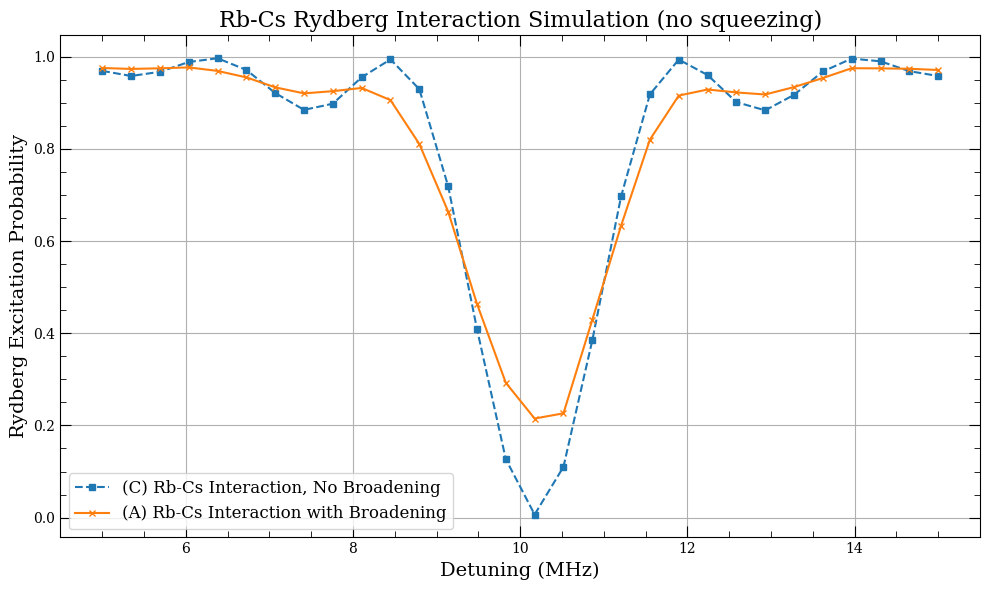

In [57]:
# ---------------------------------
# Main simulation
# ---------------------------------

# (B) without interaction
# start_time = time.time()
# d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# print(f"time for (B) without interaction: {time.time() - start_time:.1f} s")

# (C) without broadening
start_time = time.time()
d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
print(f"time for (C) without broadening: {time.time() - start_time:.1f} s")

# (A) with interaction
start_time = time.time()
d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")

print("Simulation done.")

# Plotting
plt.figure(figsize=(10,6))
# plt.plot(d / 1e6, P_no, '-', label='(B) No Interaction', markersize=5)
plt.plot(d / 1e6, P_no_broad, 's--', label='(C) Rb-Cs Interaction, No Broadening', markersize=5)
plt.plot(d / 1e6, P_int, 'x-', label='(A) Rb-Cs Interaction with Broadening', markersize=5)
plt.xlabel('Detuning (MHz)', fontsize=14)
plt.ylabel('Rydberg Excitation Probability', fontsize=14)
plt.title('Rb-Cs Rydberg Interaction Simulation (no squeezing)', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

## NaCs

Computed C6: 46.84245988763817 GHz·μm^6
C6 (Na 60S - Cs 67S) = -46.842 GHz·μm^6
Computed C6: 119.98624236109478 GHz·μm^6
C6 (Na 61S - Cs 67S) = -119.986 GHz·μm^6
Computed C6: -408.4817840926968 GHz·μm^6
C6 (Na 62S - Cs 67S) = 408.482 GHz·μm^6
Computed C6: 1901.5699250069172 GHz·μm^6
C6 (Na 63S - Cs 67S) = -1901.570 GHz·μm^6
Computed C6: -517.6530696751812 GHz·μm^6
C6 (Na 64S - Cs 67S) = 517.653 GHz·μm^6
Computed C6: -779.130333969948 GHz·μm^6
C6 (Na 65S - Cs 67S) = 779.130 GHz·μm^6
Computed C6: 307.3281094199567 GHz·μm^6
C6 (Na 66S - Cs 67S) = -307.328 GHz·μm^6
Computed C6: 6885.392962990203 GHz·μm^6
C6 (Na 67S - Cs 67S) = -6885.393 GHz·μm^6
Computed C6: 251.3261038188997 GHz·μm^6
C6 (Na 68S - Cs 67S) = -251.326 GHz·μm^6
Computed C6: 140.40131049016486 GHz·μm^6
C6 (Na 69S - Cs 67S) = -140.401 GHz·μm^6
Computed C6: 97.12325678359116 GHz·μm^6
C6 (Na 70S - Cs 67S) = -97.123 GHz·μm^6


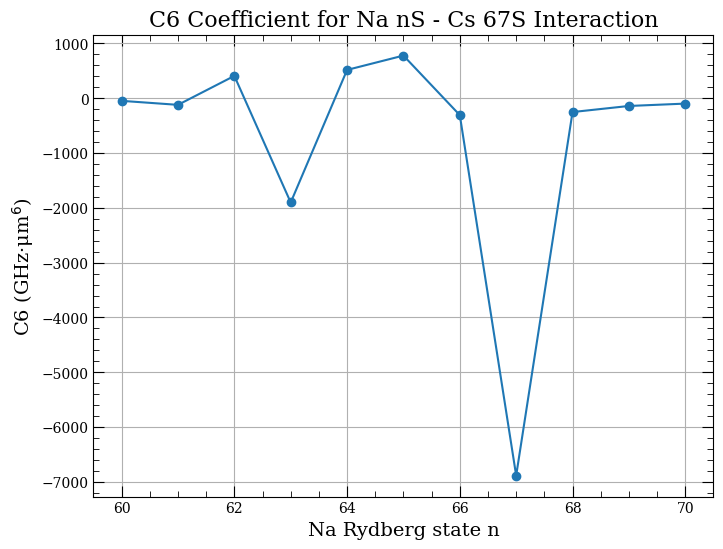

In [14]:
# plotting C6 coefficient calculation for various rydberg states of Na (fix Cs)

Cs_state = 67
Na_states = np.linspace(60, 70, 11, dtype=int)  # n=60 to 70
C6_values = []

for n_Na in Na_states:
    cfg_temp = ExperimentConfig(
        n_atom1 = n_Na,  # Na Rydberg n
        wavelength_nm_atom1 = 700,  # Na tweezer wavelength

        n_atom2 = Cs_state,  # Cs Rydberg n
    )
    start_time = time.time()
    c6_temp = compute_c6_atom1_atom2_rad_per_s_um6(cfg_temp, progress=True)
    C6_values.append(c6_temp)
    # print(f"C6 (Na {n_Na}S - Cs {Cs_state}S) = {c6_temp:.3e} rad/s·μm^6")
    print("C6 (Na %dS - Cs %dS) = %.3f GHz·μm^6" % (n_Na, Cs_state, c6_temp / (2*np.pi*1e9)))
    # print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

# plot C6 vs Na n
plt.figure(figsize=(8,6))
# plt.plot(Na_states, np.sign(C6_values) * np.log(np.abs(np.array(C6_values)/(2*np.pi*1e9))), marker='o')
plt.plot(Na_states, np.array(C6_values)/(2*np.pi*1e9), marker='o')
plt.xlabel("Na Rydberg state n", fontsize=14)
plt.ylabel("C6 (GHz·μm$^6$)", fontsize=14)
plt.title(f"C6 Coefficient for Na nS - Cs {Cs_state}S Interaction", fontsize=16)
plt.grid()
plt.show()

In [3]:
## Na - Cs
# first checking without squeezing what is the position and momentum spread
pixel_to_um = 1 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    # atom1 = Rubidium(),
    # mass_atom1 = Rubidium().mass,
    # n_atom1 = 67,  # Rb Rydberg n
    # wavelength_nm_atom1 = 816,  # Rb tweezer wavelength

    # n_atom2 = 67,  # Cs Rydberg n

    R_mean_um = 5.0 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = (1)*1e6,  # Rb Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg
    t_pi_atom2_us = 1 / (2*1e6) * 1e6, # time to do pi pulse on atom2 (us)

    Delta_scan_Hz = np.linspace(5, 15, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    # T_uK_atom1 = (2.0, 2.0, 2.0), #(2.0, 2.0, 2.0), # 2.0
    # T_uK_atom2 = (2.0, 2.0, 2.0), #(1.0, 1.0, 1.0), # 1.0

    # T_uK_atom1 = (18.0, 18.0, 18.0), #(2.0, 2.0, 2.0), # 2.0
    # T_uK_atom2 = (30.0, 30.0, 30.0), #(1.0, 1.0, 1.0), # 1.0

    T_uK_atom1 = (0.0, 0.0, 0.0), #(2.0, 2.0, 2.0), # 2.0
    T_uK_atom2 = (0.0, 0.0, 0.0), #(1.0, 1.0, 1.0), # 1.0

    # These are the *ground-state* trap 20e3 of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (280e3, 280e3, 40e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (110e3, 110e3, 20e3),

    load_factor = np.sqrt(1),  # % of trap depth after dropping

    T2_atom1_s = 20e-6, # coherence time for Rb
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 200,  # number of Monte Carlo samples per detuning
    N_steps = 100,  # number of time steps in evolution

    load_depth_T_atom1 = 380, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
    simulate_atom1_recapture=True,
    simulate_atom2_recapture=True,

    squeeze_factor1 = (1.0, 1.0, 1.0),  # atom1 squeezing factor for each axis(1 = no squeezing)
    squeeze_factor2 = (1.0, 1.0, 1.0),  # atom2 squeezing factor for each axis(1 = no squeezing)
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
# c6 = 100*10**10 # for testing purposes
print(f"C6 (Na 67S - Cs 67S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 67S - Cs 67S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 67S - Cs 67S) = 2.361e+11 rad/s·μm^6
C6 (Na 67S - Cs 67S) = 37.575 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.4s, Est. remaining: 5.0s
  Point 4/30 - Elapsed: 1.0s, Est. remaining: 6.8s
  Point 6/30 - Elapsed: 1.7s, Est. remaining: 6.8s
  Point 8/30 - Elapsed: 2.4s, Est. remaining: 6.5s
  Point 10/30 - Elapsed: 3.0s, Est. remaining: 6.0s
  Point 12/30 - Elapsed: 3.6s, Est. remaining: 5.5s
  Point 14/30 - Elapsed: 4.3s, Est. remaining: 4.9s
  Point 16/30 - Elapsed: 4.9s, Est. remaining: 4.3s
  Point 18/30 - Elapsed: 5.5s, Est. remaining: 3.7s
  Point 20/30 - Elapsed: 6.2s, Est. remaining: 3.1s
  Point 22/30 - Elapsed: 6.8s, Est. remaining: 2.5s
  Point 24/30 - Elapsed: 7.5s, Est. remaining: 1.9s
  Point 26/30 - Elapsed: 8.1s, Est. remaining: 1.3s
  Point 28/30 - Elapsed: 8.8s, Est. remaining: 0.6s
  Point 30/30 - Elapsed: 9.5s, Est. remaining: 0.0s
time for (C) without broadening: 9.9 s
Starting detuning scan...
  Point 2/30 - Elapsed: 0.4s, Est. remaining: 5.1s
  Point 4/30 - Elapsed: 1.1s, Est. remaining: 7.0s
  Point 6/30 - Elapsed: 1.8s, E

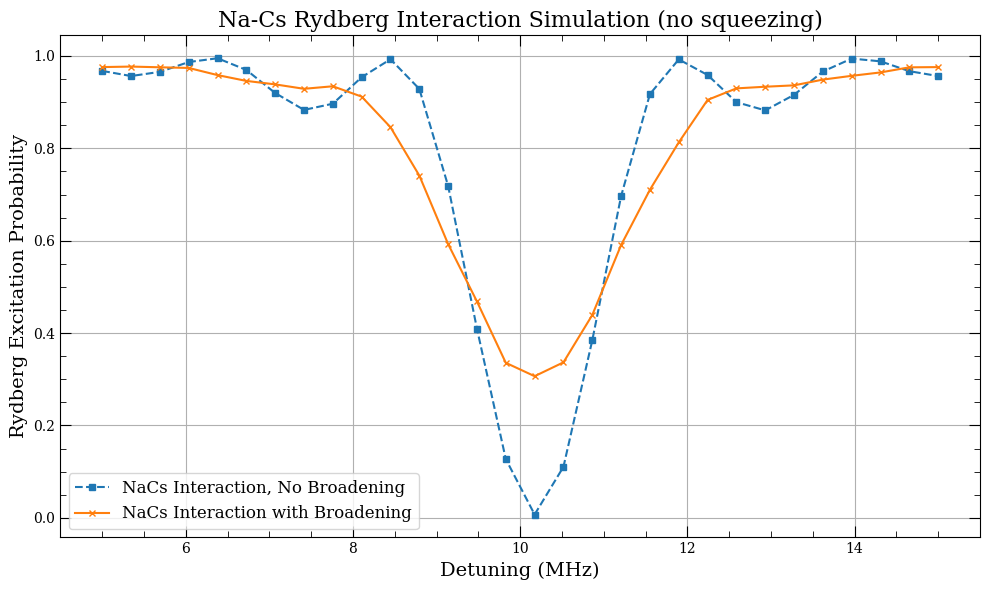

In [49]:
# ---------------------------------
# Main simulation
# ---------------------------------

# (B) without interaction
# start_time = time.time()
# d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# print(f"time for (B) without interaction: {time.time() - start_time:.1f} s")

# (C) without broadening
start_time = time.time()
d, P_no_broad_NaCs = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
print(f"time for (C) without broadening: {time.time() - start_time:.1f} s")

# (A) with interaction
start_time = time.time()
d, P_int_NaCs = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")

print("Simulation done.")

# Plotting
plt.figure(figsize=(10,6))
# plt.plot(d / 1e6, P_no, '-', label='(B) No Interaction', markersize=5)
plt.plot(d / 1e6, P_no_broad_NaCs, 's--', label='NaCs Interaction, No Broadening', markersize=5)
plt.plot(d / 1e6, P_int_NaCs, 'x-', label='NaCs Interaction with Broadening', markersize=5)
plt.xlabel('Detuning (MHz)', fontsize=14)
plt.ylabel('Rydberg Excitation Probability', fontsize=14)
plt.title('Na-Cs Rydberg Interaction Simulation (no squeezing)', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

Combine NaCs and RbCs plots from above

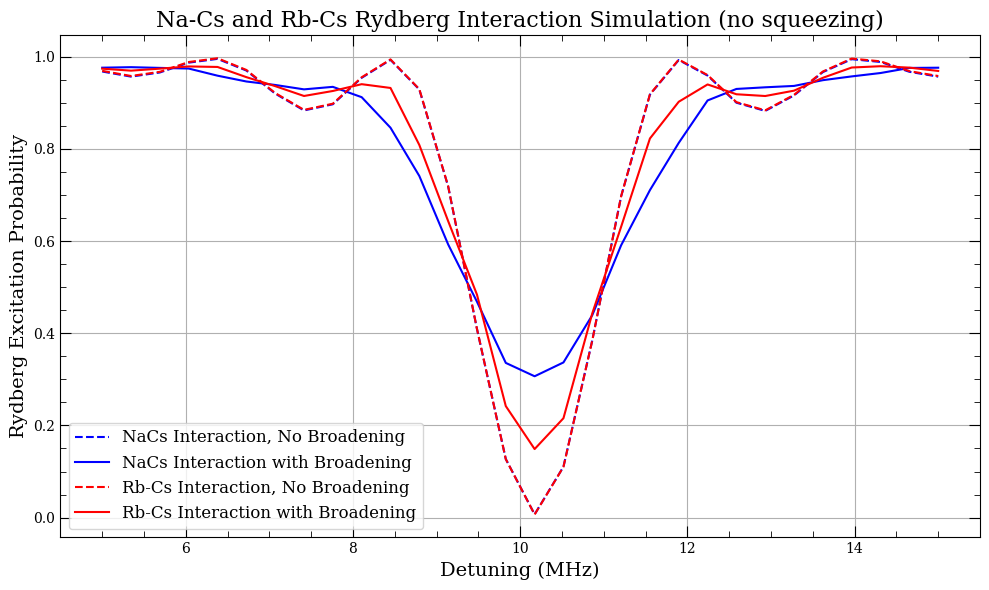

In [50]:
# combine NaCs and RbCs plots from above
plt.figure(figsize=(10,6))
# plt.plot(d / 1e6, P_no, '-', label='(B) No Interaction', markersize=5)
plt.plot(d / 1e6, P_no_broad_NaCs, '--', color = 'b', label='NaCs Interaction, No Broadening', markersize=5)
plt.plot(d / 1e6, P_int_NaCs, '-', color = 'b', label='NaCs Interaction with Broadening', markersize=5)
plt.plot(d / 1e6, P_no_broad, '--', color = 'r', label='Rb-Cs Interaction, No Broadening', markersize=5)
plt.plot(d / 1e6, P_int, '-', color = 'r', label='Rb-Cs Interaction with Broadening', markersize=5)
plt.xlabel('Detuning (MHz)', fontsize=14)
plt.ylabel('Rydberg Excitation Probability', fontsize=14)
plt.title('Na-Cs and Rb-Cs Rydberg Interaction Simulation (no squeezing)', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

## Sweeping $n_{Cs}$ along with $n_{Rb}$ (and $n_{Na}$)

In [15]:
# sweep n_Cs along with n_Rb and n_Na
Cs_states = np.linspace(50, 70, 21, dtype=int)  # n=50 to 70
max_C6_Na = []
max_C6_Rb = []
max_n_Na = []
max_n_Rb = []
full_C6_Na = {}
full_C6_Rb = {}
full_n_Na = {}
full_n_Rb = {}
for i in range(len(Cs_states)):
    Rb_states = np.linspace(Cs_states[i]-5, Cs_states[i]+5, 11, dtype=int)
    Na_states = np.linspace(Cs_states[i]-5, Cs_states[i]+5, 11, dtype=int)
    C6_values_Na = []
    C6_values_Rb = []
    for n_Na in Na_states:
        cfg_temp = ExperimentConfig(
            atom1 = Sodium(),
            mass_atom1 = Sodium().mass,
            n_atom1 = n_Na,  # Na Rydberg n
            wavelength_nm_atom1 = 700,  # Na tweezer wavelength

            n_atom2 = Cs_states[i],  # Cs Rydberg n
        )
        start_time = time.time()
        c6_temp = compute_c6_atom1_atom2_rad_per_s_um6(cfg_temp, progress=True)
        # c6_temp = compute_c6_exact_diagonalization(cfg_temp, progress=True)
        C6_values_Na.append(c6_temp)
        # print("C6 (Na %dS - Cs %dS) = %.3f GHz·μm^6" % (n_Na, Cs_states[i], c6_temp / (2*np.pi*1e9)))
    max_C6_Na.append(np.abs(np.array(C6_values_Na)).max())
    max_n_Na.append(Na_states[np.abs(np.array(C6_values_Na)).argmax()])
    full_C6_Na[Cs_states[i]] = C6_values_Na
    full_n_Na[Cs_states[i]] = Na_states
    for n_Rb in Rb_states:
        cfg_temp = ExperimentConfig(
            atom1 = Rubidium(),
            mass_atom1 = Rubidium().mass,
            n_atom1 = n_Rb,  # Rb Rydberg n
            wavelength_nm_atom1 = 700,  # Rb tweezer wavelength

            n_atom2 = Cs_states[i],  # Cs Rydberg n
        )
        start_time = time.time()
        c6_temp = compute_c6_atom1_atom2_rad_per_s_um6(cfg_temp, progress=True)
        # c6_temp = compute_c6_exact_diagonalization(cfg_temp, progress=True)
        C6_values_Rb.append(c6_temp)
        # print("C6 (Rb %dS - Cs %dS) = %.3f GHz·μm^6" % (n_Rb, Cs_states[i], c6_temp / (2*np.pi*1e9)))
    max_C6_Rb.append(np.abs(np.array(C6_values_Rb)).max())
    max_n_Rb.append(Rb_states[np.abs(np.array(C6_values_Rb)).argmax()])
    full_C6_Rb[Cs_states[i]] = C6_values_Rb
    full_n_Rb[Cs_states[i]] = Rb_states

Computed C6: 6.390411720201501 GHz·μm^6
Computed C6: 10.054825597387604 GHz·μm^6
Computed C6: -14.500412367867982 GHz·μm^6
Computed C6: -27.11985762848634 GHz·μm^6
Computed C6: -3.6408074448325523 GHz·μm^6
Computed C6: 9.329248889527282 GHz·μm^6
Computed C6: 4.059892845481393 GHz·μm^6
Computed C6: 2.650748839883393 GHz·μm^6
Computed C6: 2.0084355950162482 GHz·μm^6
Computed C6: 1.6496244663340878 GHz·μm^6
Computed C6: 1.4370381404024457 GHz·μm^6
Computed C6: 1.0482603886514401 GHz·μm^6
Computed C6: 2.7196183830533562 GHz·μm^6
Computed C6: 49.77338961531081 GHz·μm^6
Computed C6: -98.33307395166217 GHz·μm^6
Computed C6: -11.517046448882297 GHz·μm^6
Computed C6: -28.815032728900132 GHz·μm^6
Computed C6: -3.039547558811287 GHz·μm^6
Computed C6: 10.606634938217733 GHz·μm^6
Computed C6: 4.269201913357071 GHz·μm^6
Computed C6: 2.757510346425333 GHz·μm^6
Computed C6: 2.068414131202195 GHz·μm^6
Computed C6: 8.9996078004011 GHz·μm^6
Computed C6: 14.105399961733422 GHz·μm^6
Computed C6: -18.539894

/var/folders/dl/1_hpd6p57ljbk5_db1fz2pwc0000gn/T/ipykernel_1262/1871697057.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter([Cs_n]*len(Na_n_vals), C6_vals, color = 'blue', vmin=-1e4, vmax=1e4, label='Na-Cs' if i==0 else "")
/var/folders/dl/1_hpd6p57ljbk5_db1fz2pwc0000gn/T/ipykernel_1262/1871697057.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter([Cs_n]*len(Rb_n_vals), C6_vals, color = 'red', vmin=-1e4, vmax=1e4, label='Rb-Cs' if i==0 else "")


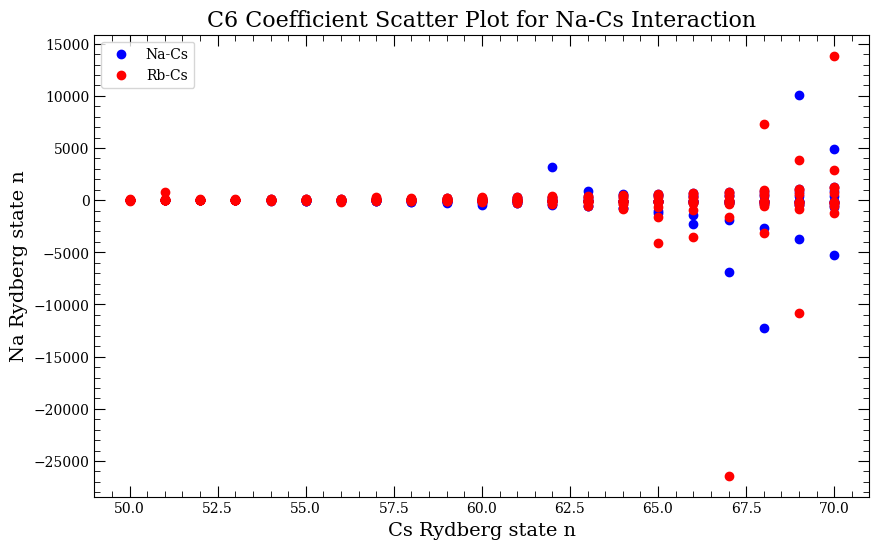

In [16]:
# plot all C6 values as dots for Na-Cs
plt.figure(figsize=(10,6))
for i, Cs_n in enumerate(full_C6_Na.keys()):
    Na_n_vals = list(full_n_Na[Cs_n])
    C6_vals = [full_C6_Na[Cs_n][j]/(2*np.pi*1e9) for j in range(len(Na_n_vals))]  # GHz·μm^6
    plt.scatter([Cs_n]*len(Na_n_vals), C6_vals, color = 'blue', vmin=-1e4, vmax=1e4, label='Na-Cs' if i==0 else "")
# now Rb-Cs
for i, Cs_n in enumerate(full_C6_Rb.keys()):
    Rb_n_vals = list(full_n_Rb[Cs_n])
    C6_vals = [full_C6_Rb[Cs_n][j]/(2*np.pi*1e9) for j in range(len(Rb_n_vals))]  # GHz·μm^6
    plt.scatter([Cs_n]*len(Rb_n_vals), C6_vals, color = 'red', vmin=-1e4, vmax=1e4, label='Rb-Cs' if i==0 else "")
# plt.colorbar(label='C6 (GHz·μm$^6$)')
plt.xlabel('Cs Rydberg state n', fontsize=14)
plt.ylabel('Na Rydberg state n', fontsize=14)
plt.title('C6 Coefficient Scatter Plot for Na-Cs Interaction', fontsize=16)
plt.legend()
plt.show()

In [5]:
# create a new txt file and save the arrays of data to it (add data and time to each file)
import datetime

with open(f'C6_NaCs_data_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.txt', 'w') as f:
    f.write('Cs_n,Na_n,C6_GHz_um6\n')
    for i, Cs_n in enumerate(full_C6_Na.keys()):
        Na_n_vals = list(full_n_Na[Cs_n])
        C6_vals = [full_C6_Na[Cs_n][j]/(2*np.pi*1e9) for j in range(len(Na_n_vals))]  # GHz·μm^6
        for j in range(len(Na_n_vals)):
            f.write(f'{Cs_n},{Na_n_vals[j]},{C6_vals[j]}\n')

with open(f'C6_RbCs_data_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.txt', 'w') as f:
    f.write('Cs_n,Rb_n,C6_GHz_um6\n')
    for i, Cs_n in enumerate(full_C6_Rb.keys()):
        Rb_n_vals = list(full_n_Rb[Cs_n])
        C6_vals = [full_C6_Rb[Cs_n][j]/(2*np.pi*1e9) for j in range(len(Rb_n_vals))]  # GHz·μm^6
        for j in range(len(Rb_n_vals)):
            f.write(f'{Cs_n},{Rb_n_vals[j]},{C6_vals[j]}\n')


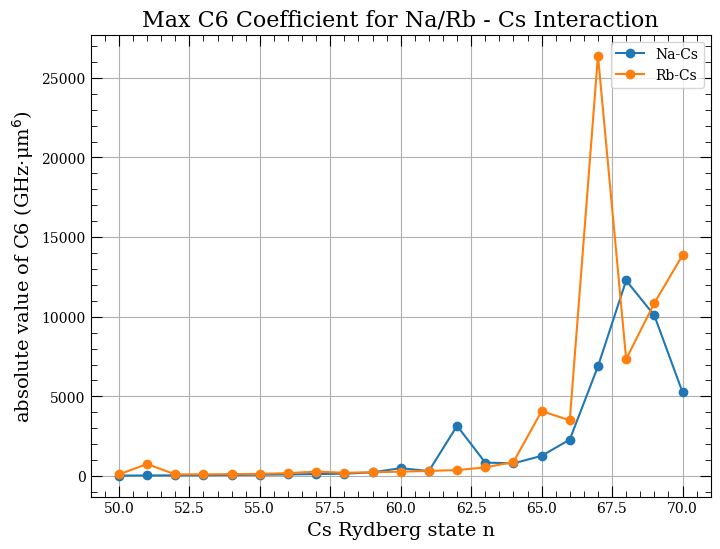

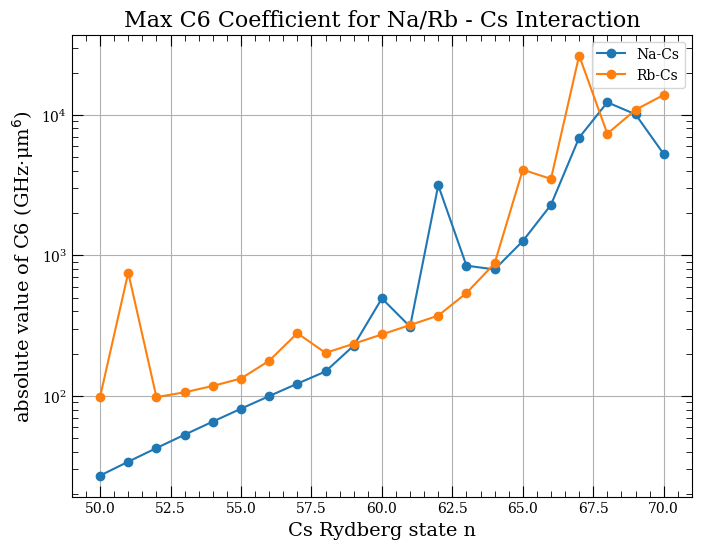

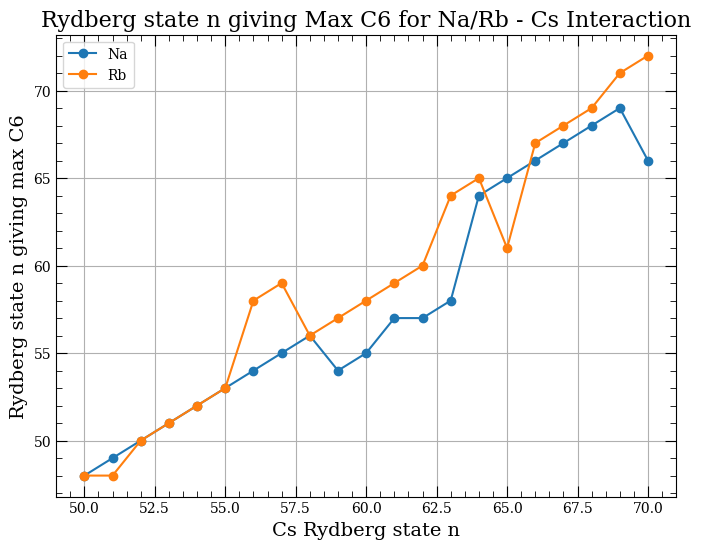

In [17]:
# plot the max C6 for each Cs state for Na and Rb
plt.figure(figsize=(8,6))
plt.plot(Cs_states, np.array(max_C6_Na)/(2*np.pi*1e9), marker='o', label='Na-Cs')
plt.plot(Cs_states, np.array(max_C6_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Cs')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("absolute value of C6 (GHz·μm$^6$)", fontsize=14)
plt.title("Max C6 Coefficient for Na/Rb - Cs Interaction", fontsize=16)
plt.legend()
plt.grid()
plt.show()

# plot the max C6 for each Cs state for Na and Rb (log scale)
plt.figure(figsize=(8,6))
plt.plot(Cs_states, np.array(max_C6_Na)/(2*np.pi*1e9), marker='o', label='Na-Cs')
plt.plot(Cs_states, np.array(max_C6_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Cs')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("absolute value of C6 (GHz·μm$^6$)", fontsize=14)
plt.title("Max C6 Coefficient for Na/Rb - Cs Interaction", fontsize=16)
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

# plot the n values that give max C6 for each Cs state
plt.figure(figsize=(8,6))
plt.plot(Cs_states, max_n_Na, marker='o', label='Na')
plt.plot(Cs_states, max_n_Rb, marker='o', label='Rb')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("Rydberg state n giving max C6", fontsize=14)
plt.title("Rydberg state n giving Max C6 for Na/Rb - Cs Interaction", fontsize=16)
plt.legend()
plt.grid()
plt.show()

### Intraspecies interaction


Calculating Hamiltonian matrix...


	matrix (dimension  407 )

Matrix R3 100.0 % (state 137 of 137)



Diagonalizing interaction matrix...

90%c6 =  10.856893420914556  GHz /R^6 (mu m)^6
offset =  2.9009132776637056e-08

Calculating Hamiltonian matrix...


	matrix (dimension  585 )

Matrix R3 100.0 % (state 189 of 189)



Diagonalizing interaction matrix...

90%c6 =  21.880184536836442  GHz /R^6 (mu m)^6
offset =  8.730368160993802e-08

Calculating Hamiltonian matrix...


	matrix (dimension  369 )

Matrix R3 100.0 % (state 121 of 121)



Diagonalizing interaction matrix...

90%c6 =  9.392635584503862  GHz /R^6 (mu m)^6
offset =  1.6622483196735333e-08

Calculating Hamiltonian matrix...


	matrix (dimension  431 )

Matrix R3 100.0 % (state 145 of 145)



Diagonalizing interaction matrix...

90%c6 =  13.862555680863641  GHz /R^6 (mu m)^6
offset =  4.290233897159929e-08

Calculating Hamiltonian matrix...


	matrix (dimension  601 )

Matrix R3 100.0 % (state 197 of 197)



Diagonalizing i

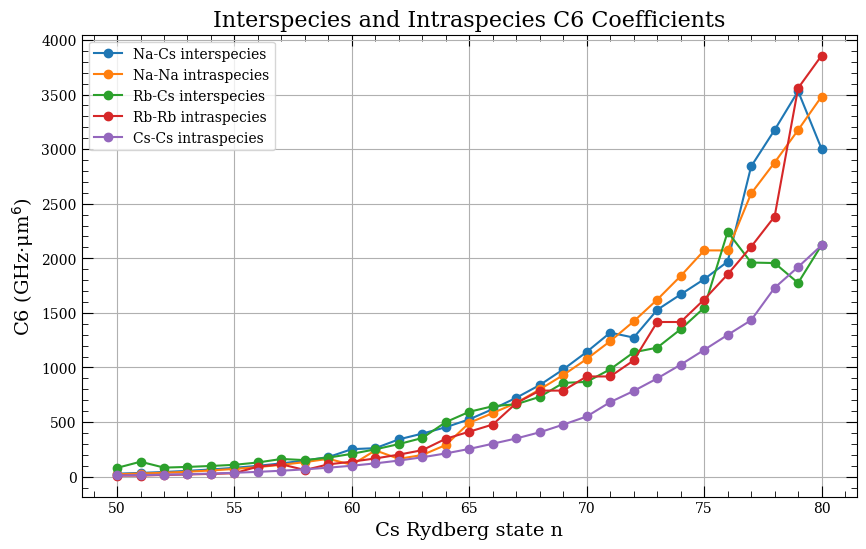

In [8]:
# for each max C6 above, find the intraspecies C6 for Cs-Cs, Na-Na, and Rb-Rb at those n values
C6_intra_Cs = []
C6_intra_Na = []
C6_intra_Rb = []
for i in range(len(Cs_states)):
    # Cs-Cs
    cfg_temp = ExperimentConfig(
        atom1 = Cesium(),
        mass_atom1 = Cesium().mass,
        n_atom1 = Cs_states[i],  # Cs Rydberg n

        atom2 = Cesium(),
        mass_atom2 = Cesium().mass,
        n_atom2 = Cs_states[i],  # Cs Rydberg n
    )
    c6_temp = compute_c6_exact_diagonalization(cfg_temp, progress=True)
    C6_intra_Cs.append(c6_temp)

    # Na-Na
    cfg_temp = ExperimentConfig(
        atom1 = Sodium(),
        mass_atom1 = Sodium().mass,
        n_atom1 = max_n_Na[i],  # Na Rydberg n

        atom2 = Sodium(),
        mass_atom2 = Sodium().mass,
        n_atom2 = max_n_Na[i],  # Na Rydberg n
    )
    c6_temp = compute_c6_exact_diagonalization(cfg_temp, progress=True)
    C6_intra_Na.append(c6_temp)

    # Rb-Rb
    cfg_temp = ExperimentConfig(
        atom1 = Rubidium(),
        mass_atom1 = Rubidium().mass,
        n_atom1 = max_n_Rb[i],  # Rb Rydberg n

        atom2 = Rubidium(),
        mass_atom2 = Rubidium().mass,
        n_atom2 = max_n_Rb[i],  # Rb Rydberg n
    )
    c6_temp = compute_c6_exact_diagonalization(cfg_temp, progress=True)
    C6_intra_Rb.append(c6_temp)


# plot the interspecies and intraspecies C6 for each Cs state
plt.figure(figsize=(10,6))
plt.plot(Cs_states, np.array(max_C6_Na)/(2*np.pi*1e9), marker='o', label='Na-Cs interspecies')
plt.plot(Cs_states, np.array(C6_intra_Na)/(2*np.pi*1e9), marker='o', label='Na-Na intraspecies')
plt.plot(Cs_states, np.array(max_C6_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Cs interspecies')
plt.plot(Cs_states, np.array(C6_intra_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Rb intraspecies')
plt.plot(Cs_states, np.array(C6_intra_Cs)/(2*np.pi*1e9), marker='o', label='Cs-Cs intraspecies')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("C6 (GHz·μm$^6$)", fontsize=14)
plt.title("Interspecies and Intraspecies C6 Coefficients", fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [12]:
# save the intraspecies C6 data to a txt file
with open(f'C6_intraspecies_data_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.txt', 'w') as f:
    f.write('Cs_n,C6_CsCs_GHz_um6,Na_n,C6_NaNa_GHz_um6,Rb_n,C6_RbRb_GHz_um6\n')
    for i in range(len(Cs_states)):
        f.write(f'{Cs_states[i]},{C6_intra_Cs[i]/(2*np.pi*1e9)},{max_n_Na[i]},{C6_intra_Na[i]/(2*np.pi*1e9)},{max_n_Rb[i]},{C6_intra_Rb[i]/(2*np.pi*1e9)}\n')


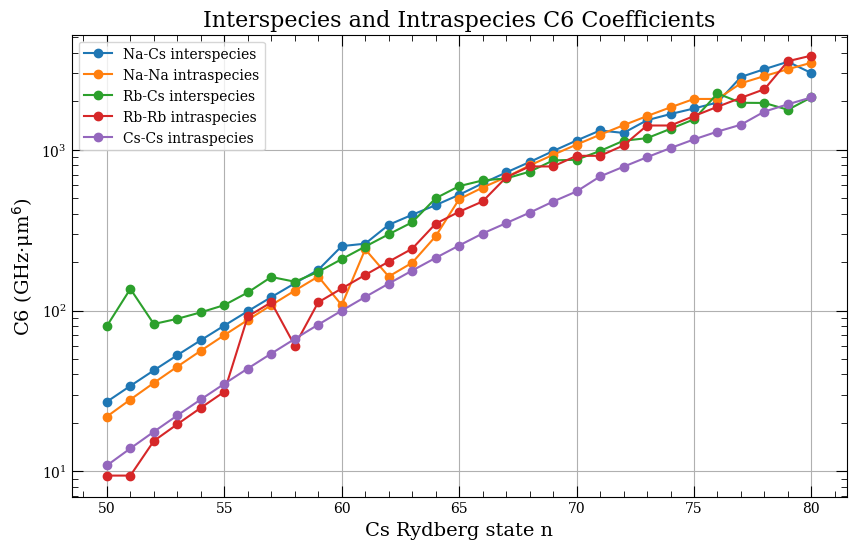

In [9]:
# plot the interspecies and intraspecies C6 for each Cs state
plt.figure(figsize=(10,6))
plt.plot(Cs_states, np.array(max_C6_Na)/(2*np.pi*1e9), marker='o', label='Na-Cs interspecies')
plt.plot(Cs_states, np.array(C6_intra_Na)/(2*np.pi*1e9), marker='o', label='Na-Na intraspecies')
plt.plot(Cs_states, np.array(max_C6_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Cs interspecies')
plt.plot(Cs_states, np.array(C6_intra_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Rb intraspecies')
plt.plot(Cs_states, np.array(C6_intra_Cs)/(2*np.pi*1e9), marker='o', label='Cs-Cs intraspecies')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("C6 (GHz·μm$^6$)", fontsize=14)
plt.title("Interspecies and Intraspecies C6 Coefficients", fontsize=16)
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

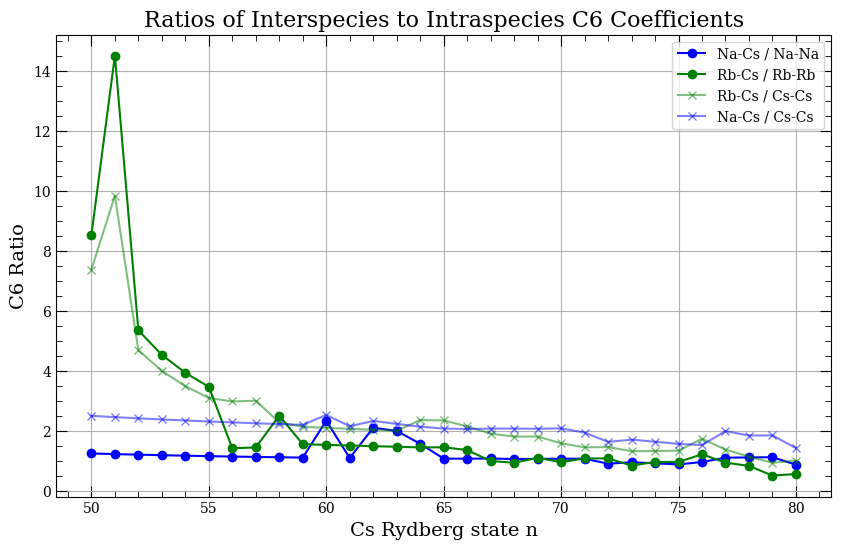

In [11]:
# plot the ratios of interspecies to intraspecies C6 for each Cs state
plt.figure(figsize=(10,6))
plt.plot(Cs_states, np.array(max_C6_Na)/np.array(C6_intra_Na), marker='o', color='blue', label='Na-Cs / Na-Na')
plt.plot(Cs_states, np.array(max_C6_Rb)/np.array(C6_intra_Rb), marker='o', color='green', label='Rb-Cs / Rb-Rb')
plt.plot(Cs_states, np.array(max_C6_Rb)/np.array(C6_intra_Cs), marker='x', color='green', label='Rb-Cs / Cs-Cs', alpha = 0.5)
plt.plot(Cs_states, np.array(max_C6_Na)/np.array(C6_intra_Cs), marker='x', color='blue', label='Na-Cs / Cs-Cs', alpha = 0.5)
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("C6 Ratio", fontsize=14)
plt.title("Ratios of Interspecies to Intraspecies C6 Coefficients", fontsize=16)
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

# Checking with exact diagonalization

In [33]:
# exact diagonalization C6 calculation function
def compute_c6_exact_diagonalization(cfg: ExperimentConfig,
                                   theta: float = 0.0, phi: float = 0.0,
                                   nRange: int = 5, lRange: int = 5,
                                   deltaMax_Hz: float = 25e9,
                                   r_range_um: Tuple[float, float] = (3.0, 10.0),
                                   n_eigs: int = 250,
                                   progress: bool = False) -> float:
    calc = PairStateInteractions(
        cfg.atom1, cfg.n_atom1, cfg.l_atom1, cfg.j_atom1,
        cfg.n_atom2, cfg.l_atom2, cfg.j_atom2,
        m1=0.5, m2=0.5, atom2=cfg.atom2
    )
    calc.defineBasis(0, 0, 5, 3, 25e9, progressOutput=True)
    r = np.linspace(3, 10, 10)
    calc.diagonalise(r, 200, progressOutput=True)
    c6_freq_um6 = calc.getC6fromLevelDiagram(3, 10, showPlot=False)
    c6_Hz_um6 = c6_freq_um6 * 1.0e9  # GHz -> Hz if needed by ARC version
    c6_rad_um6 = TWOPI * c6_Hz_um6   # Hz -> rad/s
    return c6_rad_um6

## initial testing.


Calculating Hamiltonian matrix...


	matrix (dimension  425 )

Matrix R3 100.0 % (state 144 of 144)



Diagonalizing interaction matrix...

0% Now we are plotting...

Energy shift at 10 um (Rb 48S - Cs 51S) from exact diagonalization = 3.979e+00 GHz


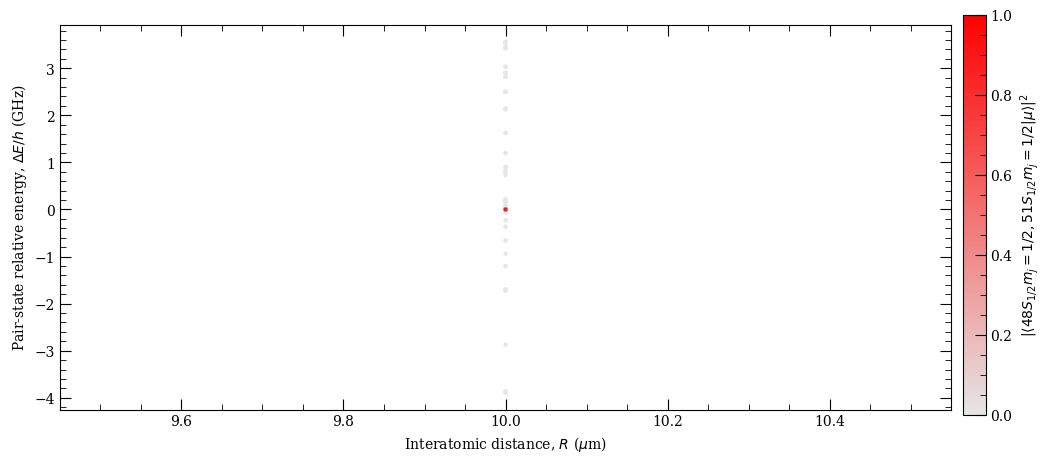

In [41]:
# check the C6 coefficient value with exact diagonalization using ARC
atom1 = Rubidium()
atom2 = Cesium()
n_atom1 = 48
l_atom1 = 0
j_atom1 = 0.5
n_atom2 = 51
l_atom2 = 0
j_atom2 = 0.5


# Build inter-species pair-state calculation
calc = PairStateInteractions(
    atom1, n_atom1, l_atom1, j_atom1,
    n_atom2, l_atom2, j_atom2,
    m1=0.5, m2=0.5, atom2=atom2
)
calc.defineBasis(0, 0, 5, 3, 25e9, progressOutput=True)
# r = np.linspace(9, 50, 50)
calc.diagonalise([10], 100, progressOutput=True)
calc.plotLevelDiagram()
# grab energy shift value for this distance
energy_shift = calc.energyDelta / (2*np.pi*1e9)
print(f"\nEnergy shift at 10 um (Rb {n_atom1}S - Cs {n_atom2}S) from exact diagonalization = {energy_shift:.3e} GHz")
# ARC returns C6 typically as frequency×μm^6 (e.g., GHz·μm^6). Convert to Hz·μm^6 then to rad/s·μm^6.
# c6_freq_um6 = calc.getC6fromLevelDiagram(9, 50, showPlot=True)
# c6_Hz_um6 = c6_freq_um6 * 1.0e9  # GHz -> Hz if needed by ARC version
# c6_rad_um6 = TWOPI * c6_Hz_um6   # Hz -> rad/s
# print(f"\nC6 (Rb {n_atom1}S - Cs {n_atom2}S) from exact diagonalization = {c6_rad_um6:.3e} rad/s·μm^6")
# print("C6 (Rb %dS - Cs %dS) from exact diagonalization = %.3f GHz·μm^6" % (n_atom1, n_atom2, c6_rad_um6 / (2*np.pi*1e9)))
# vdw_r = calc.getVdwFromLevelDiagram(4, 10, showPlot=True)
# print(vdw_r)

# print(f"\nC6 (Na {n_atom1}S - Cs {n_atom2}S) from exact diagonalization = {c6_rad_um6:.3e} rad/s·μm^6")
# print("C6 (Na %dS - Cs %dS) from exact diagonalization = %.3f GHz·μm^6" % (n_atom1, n_atom2, c6_rad_um6 / (2*np.pi*1e9)))

In [ ]:
# check the C6 coefficient value with exact diagonalization using ARC
atom1 = Sodium()
atom2 = Cesium()
n_atom1 = 51
l_atom1 = 0
j_atom1 = 0.5
n_atom2 = 54
l_atom2 = 0
j_atom2 = 0.5

# Build inter-species pair-state calculation
calc = PairStateInteractions(
    atom1, n_atom1, l_atom1, j_atom1,
    n_atom2, l_atom2, j_atom2,
    m1=0.5, m2=0.5, atom2=atom2
)
calc.defineBasis(0, 0, 5, 3, 25e9, progressOutput=True)

R_um = 5
calc.diagonalise([R_um], 200, progressOutput=True)

# find state with highest overlap with target state
j = np.argmax(np.abs(calc.highlight[0]))
print("shift at", R_um, "um =", calc.y[0][j], "GHz")


Calculating Hamiltonian matrix...


	matrix (dimension  635 )

Matrix R3 100.0 % (state 209 of 209)



Diagonalizing interaction matrix...

0%shift at 5 um = 0.002404184121078444 GHz


In [ ]:
# sweep the n and l values to check convergence
# check the C6 coefficient value with exact diagonalization using ARC
atom1 = Rubidium()
atom2 = Cesium()
n_atom1 = 68
l_atom1 = 0
j_atom1 = 0.5
n_atom2 = 67
l_atom2 = 0
j_atom2 = 0.5


# Build inter-species pair-state calculation
calc = PairStateInteractions(
    atom1, n_atom1, l_atom1, j_atom1,
    n_atom2, l_atom2, j_atom2,
    m1=0.5, m2=0.5, atom2=atom2
)
vals = []
for l in range(3, 10):
    calc.defineBasis(0, 0, l, 2, 25e9, progressOutput=True)
    r = np.linspace(3, 10, 10)
    calc.diagonalise(r, 200, progressOutput=True)

    # ARC returns C6 typically as frequency×μm^6 (e.g., GHz·μm^6). Convert to Hz·μm^6 then to rad/s·μm^6.
    c6_freq_um6 = calc.getC6fromLevelDiagram(3, 10, showPlot=False)
    c6_Hz_um6 = c6_freq_um6 * 1.0e9  # GHz -> Hz if needed by ARC version
    c6_rad_um6 = TWOPI * c6_Hz_um6   # Hz -> rad/s

    vals.append(c6_rad_um6)
    print(f"C6 (Rb {n_atom1}S - Cs {n_atom2}S) from exact diagonalization = {c6_rad_um6:.3e} rad/s·μm^6")
    print("C6 (Rb %dS - Cs %dS) from exact diagonalization = %.3f GHz·μm^6" % (n_atom1, n_atom2, c6_rad_um6 / (2*np.pi*1e9)))

# plot C6 vs lRange
plt.figure(figsize=(8,6))
plt.plot(range(3,10), np.array(vals)/(2*np.pi*1e9), marker='o')
plt.xlabel("nRange", fontsize=14)
plt.ylabel("C6 (GHz·μm$^6$)", fontsize=14)
plt.title(f"C6 Coefficient for Rb {n_atom1}S - Cs {n_atom2}S Interaction vs nRange", fontsize=16)
plt.grid()
plt.show()

## sweeping quantum numbers

In [ ]:
# sweep n_Cs along with n_Rb and n_Na
Cs_states = np.linspace(50, 70, 21, dtype=int)  # n=50 to 70
max_C6_Na = []
max_C6_Rb = []
max_n_Na = []
max_n_Rb = []
full_C6_Na = {}
full_C6_Rb = {}
full_n_Na = {}
full_n_Rb = {}
for i in range(len(Cs_states)):
    Rb_states = np.linspace(Cs_states[i]-5, Cs_states[i]+5, 11, dtype=int)
    Na_states = np.linspace(Cs_states[i]-5, Cs_states[i]+5, 11, dtype=int)
    C6_values_Na = []
    C6_values_Rb = []
    for n_Na in Na_states:
        cfg_temp = ExperimentConfig(
            atom1 = Sodium(),
            mass_atom1 = Sodium().mass,
            n_atom1 = n_Na,  # Na Rydberg n
            wavelength_nm_atom1 = 700,  # Na tweezer wavelength

            n_atom2 = Cs_states[i],  # Cs Rydberg n
        )
        start_time = time.time()
        c6_temp = compute_c6_atom1_atom2_rad_per_s_um6(cfg_temp, progress=True)
        # c6_temp = compute_c6_exact_diagonalization(cfg_temp, progress=True)
        C6_values_Na.append(c6_temp)
        # print("C6 (Na %dS - Cs %dS) = %.3f GHz·μm^6" % (n_Na, Cs_states[i], c6_temp / (2*np.pi*1e9)))
    max_C6_Na.append(np.abs(np.array(C6_values_Na)).max())
    max_n_Na.append(Na_states[np.abs(np.array(C6_values_Na)).argmax()])
    full_C6_Na[Cs_states[i]] = C6_values_Na
    full_n_Na[Cs_states[i]] = Na_states
    for n_Rb in Rb_states:
        cfg_temp = ExperimentConfig(
            atom1 = Rubidium(),
            mass_atom1 = Rubidium().mass,
            n_atom1 = n_Rb,  # Rb Rydberg n
            wavelength_nm_atom1 = 700,  # Rb tweezer wavelength

            n_atom2 = Cs_states[i],  # Cs Rydberg n
        )
        start_time = time.time()
        c6_temp = compute_c6_atom1_atom2_rad_per_s_um6(cfg_temp, progress=True)
        # c6_temp = compute_c6_exact_diagonalization(cfg_temp, progress=True)
        C6_values_Rb.append(c6_temp)
        # print("C6 (Rb %dS - Cs %dS) = %.3f GHz·μm^6" % (n_Rb, Cs_states[i], c6_temp / (2*np.pi*1e9)))
    max_C6_Rb.append(np.abs(np.array(C6_values_Rb)).max())
    max_n_Rb.append(Rb_states[np.abs(np.array(C6_values_Rb)).argmax()])
    full_C6_Rb[Cs_states[i]] = C6_values_Rb
    full_n_Rb[Cs_states[i]] = Rb_states

Computed C6: 6.390411720201501 GHz·μm^6
Computed C6: 10.054825597387604 GHz·μm^6
Computed C6: -14.500412367867982 GHz·μm^6
Computed C6: -27.11985762848634 GHz·μm^6
Computed C6: -3.6408074448325523 GHz·μm^6
Computed C6: 9.329248889527282 GHz·μm^6
Computed C6: 4.059892845481393 GHz·μm^6
Computed C6: 2.650748839883393 GHz·μm^6
Computed C6: 2.0084355950162482 GHz·μm^6
Computed C6: 1.6496244663340878 GHz·μm^6
Computed C6: 1.4370381404024457 GHz·μm^6
Computed C6: 1.0482603886514401 GHz·μm^6
Computed C6: 2.7196183830533562 GHz·μm^6
Computed C6: 49.77338961531081 GHz·μm^6
Computed C6: -98.33307395166217 GHz·μm^6
Computed C6: -11.517046448882297 GHz·μm^6
Computed C6: -28.815032728900132 GHz·μm^6
Computed C6: -3.039547558811287 GHz·μm^6
Computed C6: 10.606634938217733 GHz·μm^6
Computed C6: 4.269201913357071 GHz·μm^6
Computed C6: 2.757510346425333 GHz·μm^6
Computed C6: 2.068414131202195 GHz·μm^6
Computed C6: 8.9996078004011 GHz·μm^6
Computed C6: 14.105399961733422 GHz·μm^6
Computed C6: -18.539894

/var/folders/dl/1_hpd6p57ljbk5_db1fz2pwc0000gn/T/ipykernel_1262/1871697057.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter([Cs_n]*len(Na_n_vals), C6_vals, color = 'blue', vmin=-1e4, vmax=1e4, label='Na-Cs' if i==0 else "")
/var/folders/dl/1_hpd6p57ljbk5_db1fz2pwc0000gn/T/ipykernel_1262/1871697057.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter([Cs_n]*len(Rb_n_vals), C6_vals, color = 'red', vmin=-1e4, vmax=1e4, label='Rb-Cs' if i==0 else "")


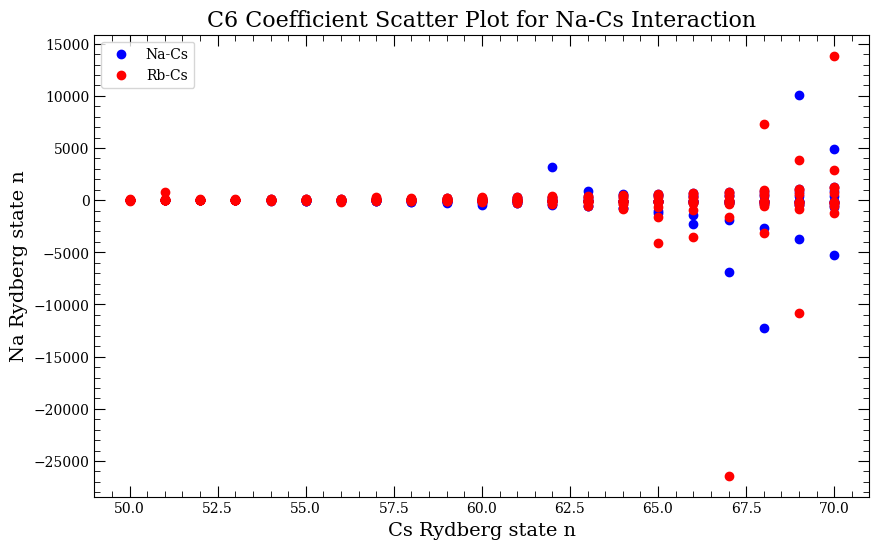

In [ ]:
# plot all C6 values as dots for Na-Cs
plt.figure(figsize=(10,6))
for i, Cs_n in enumerate(full_C6_Na.keys()):
    Na_n_vals = list(full_n_Na[Cs_n])
    C6_vals = [full_C6_Na[Cs_n][j]/(2*np.pi*1e9) for j in range(len(Na_n_vals))]  # GHz·μm^6
    plt.scatter([Cs_n]*len(Na_n_vals), C6_vals, color = 'blue', vmin=-1e4, vmax=1e4, label='Na-Cs' if i==0 else "")
# now Rb-Cs
for i, Cs_n in enumerate(full_C6_Rb.keys()):
    Rb_n_vals = list(full_n_Rb[Cs_n])
    C6_vals = [full_C6_Rb[Cs_n][j]/(2*np.pi*1e9) for j in range(len(Rb_n_vals))]  # GHz·μm^6
    plt.scatter([Cs_n]*len(Rb_n_vals), C6_vals, color = 'red', vmin=-1e4, vmax=1e4, label='Rb-Cs' if i==0 else "")
# plt.colorbar(label='C6 (GHz·μm$^6$)')
plt.xlabel('Cs Rydberg state n', fontsize=14)
plt.ylabel('Na Rydberg state n', fontsize=14)
plt.title('C6 Coefficient Scatter Plot for Na-Cs Interaction', fontsize=16)
plt.legend()
plt.show()

In [ ]:
# create a new txt file and save the arrays of data to it (add data and time to each file)
import datetime

with open(f'C6_NaCs_data_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.txt', 'w') as f:
    f.write('Cs_n,Na_n,C6_GHz_um6\n')
    for i, Cs_n in enumerate(full_C6_Na.keys()):
        Na_n_vals = list(full_n_Na[Cs_n])
        C6_vals = [full_C6_Na[Cs_n][j]/(2*np.pi*1e9) for j in range(len(Na_n_vals))]  # GHz·μm^6
        for j in range(len(Na_n_vals)):
            f.write(f'{Cs_n},{Na_n_vals[j]},{C6_vals[j]}\n')

with open(f'C6_RbCs_data_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.txt', 'w') as f:
    f.write('Cs_n,Rb_n,C6_GHz_um6\n')
    for i, Cs_n in enumerate(full_C6_Rb.keys()):
        Rb_n_vals = list(full_n_Rb[Cs_n])
        C6_vals = [full_C6_Rb[Cs_n][j]/(2*np.pi*1e9) for j in range(len(Rb_n_vals))]  # GHz·μm^6
        for j in range(len(Rb_n_vals)):
            f.write(f'{Cs_n},{Rb_n_vals[j]},{C6_vals[j]}\n')


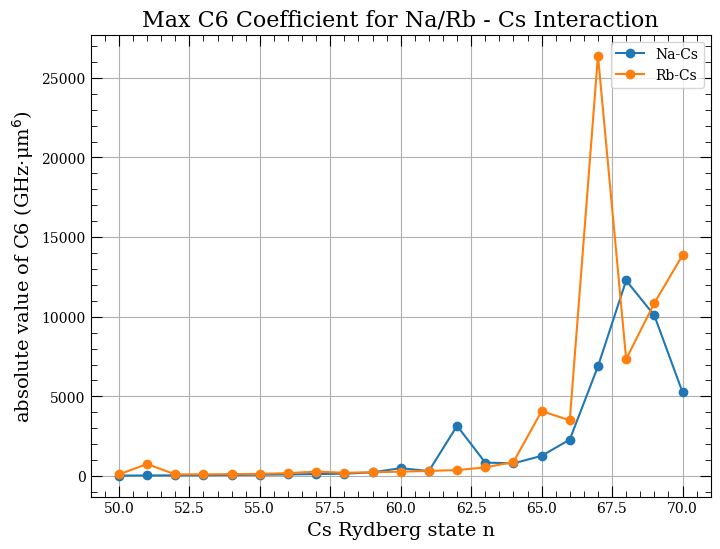

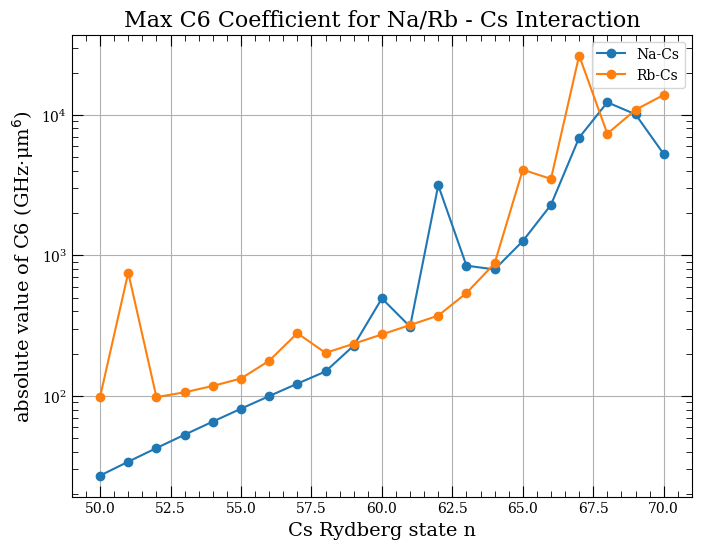

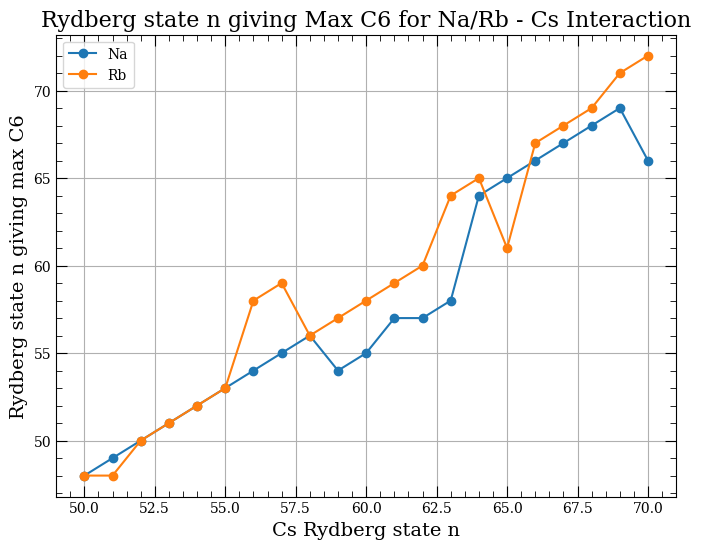

In [ ]:
# plot the max C6 for each Cs state for Na and Rb
plt.figure(figsize=(8,6))
plt.plot(Cs_states, np.array(max_C6_Na)/(2*np.pi*1e9), marker='o', label='Na-Cs')
plt.plot(Cs_states, np.array(max_C6_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Cs')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("absolute value of C6 (GHz·μm$^6$)", fontsize=14)
plt.title("Max C6 Coefficient for Na/Rb - Cs Interaction", fontsize=16)
plt.legend()
plt.grid()
plt.show()

# plot the max C6 for each Cs state for Na and Rb (log scale)
plt.figure(figsize=(8,6))
plt.plot(Cs_states, np.array(max_C6_Na)/(2*np.pi*1e9), marker='o', label='Na-Cs')
plt.plot(Cs_states, np.array(max_C6_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Cs')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("absolute value of C6 (GHz·μm$^6$)", fontsize=14)
plt.title("Max C6 Coefficient for Na/Rb - Cs Interaction", fontsize=16)
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

# plot the n values that give max C6 for each Cs state
plt.figure(figsize=(8,6))
plt.plot(Cs_states, max_n_Na, marker='o', label='Na')
plt.plot(Cs_states, max_n_Rb, marker='o', label='Rb')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("Rydberg state n giving max C6", fontsize=14)
plt.title("Rydberg state n giving Max C6 for Na/Rb - Cs Interaction", fontsize=16)
plt.legend()
plt.grid()
plt.show()

### Intraspecies interaction


Calculating Hamiltonian matrix...


	matrix (dimension  407 )

Matrix R3 100.0 % (state 137 of 137)



Diagonalizing interaction matrix...

90%c6 =  10.856893420914556  GHz /R^6 (mu m)^6
offset =  2.9009132776637056e-08

Calculating Hamiltonian matrix...


	matrix (dimension  585 )

Matrix R3 100.0 % (state 189 of 189)



Diagonalizing interaction matrix...

90%c6 =  21.880184536836442  GHz /R^6 (mu m)^6
offset =  8.730368160993802e-08

Calculating Hamiltonian matrix...


	matrix (dimension  369 )

Matrix R3 100.0 % (state 121 of 121)



Diagonalizing interaction matrix...

90%c6 =  9.392635584503862  GHz /R^6 (mu m)^6
offset =  1.6622483196735333e-08

Calculating Hamiltonian matrix...


	matrix (dimension  431 )

Matrix R3 100.0 % (state 145 of 145)



Diagonalizing interaction matrix...

90%c6 =  13.862555680863641  GHz /R^6 (mu m)^6
offset =  4.290233897159929e-08

Calculating Hamiltonian matrix...


	matrix (dimension  601 )

Matrix R3 100.0 % (state 197 of 197)



Diagonalizing i

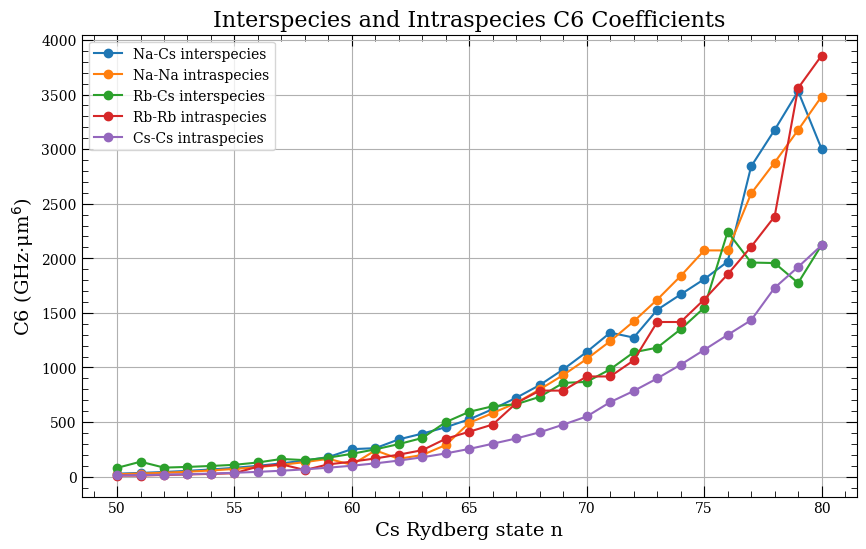

In [ ]:
# for each max C6 above, find the intraspecies C6 for Cs-Cs, Na-Na, and Rb-Rb at those n values
C6_intra_Cs = []
C6_intra_Na = []
C6_intra_Rb = []
for i in range(len(Cs_states)):
    # Cs-Cs
    cfg_temp = ExperimentConfig(
        atom1 = Cesium(),
        mass_atom1 = Cesium().mass,
        n_atom1 = Cs_states[i],  # Cs Rydberg n

        atom2 = Cesium(),
        mass_atom2 = Cesium().mass,
        n_atom2 = Cs_states[i],  # Cs Rydberg n
    )
    c6_temp = compute_c6_exact_diagonalization(cfg_temp, progress=True)
    C6_intra_Cs.append(c6_temp)

    # Na-Na
    cfg_temp = ExperimentConfig(
        atom1 = Sodium(),
        mass_atom1 = Sodium().mass,
        n_atom1 = max_n_Na[i],  # Na Rydberg n

        atom2 = Sodium(),
        mass_atom2 = Sodium().mass,
        n_atom2 = max_n_Na[i],  # Na Rydberg n
    )
    c6_temp = compute_c6_exact_diagonalization(cfg_temp, progress=True)
    C6_intra_Na.append(c6_temp)

    # Rb-Rb
    cfg_temp = ExperimentConfig(
        atom1 = Rubidium(),
        mass_atom1 = Rubidium().mass,
        n_atom1 = max_n_Rb[i],  # Rb Rydberg n

        atom2 = Rubidium(),
        mass_atom2 = Rubidium().mass,
        n_atom2 = max_n_Rb[i],  # Rb Rydberg n
    )
    c6_temp = compute_c6_exact_diagonalization(cfg_temp, progress=True)
    C6_intra_Rb.append(c6_temp)


# plot the interspecies and intraspecies C6 for each Cs state
plt.figure(figsize=(10,6))
plt.plot(Cs_states, np.array(max_C6_Na)/(2*np.pi*1e9), marker='o', label='Na-Cs interspecies')
plt.plot(Cs_states, np.array(C6_intra_Na)/(2*np.pi*1e9), marker='o', label='Na-Na intraspecies')
plt.plot(Cs_states, np.array(max_C6_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Cs interspecies')
plt.plot(Cs_states, np.array(C6_intra_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Rb intraspecies')
plt.plot(Cs_states, np.array(C6_intra_Cs)/(2*np.pi*1e9), marker='o', label='Cs-Cs intraspecies')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("C6 (GHz·μm$^6$)", fontsize=14)
plt.title("Interspecies and Intraspecies C6 Coefficients", fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# save the intraspecies C6 data to a txt file
with open(f'C6_intraspecies_data_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.txt', 'w') as f:
    f.write('Cs_n,C6_CsCs_GHz_um6,Na_n,C6_NaNa_GHz_um6,Rb_n,C6_RbRb_GHz_um6\n')
    for i in range(len(Cs_states)):
        f.write(f'{Cs_states[i]},{C6_intra_Cs[i]/(2*np.pi*1e9)},{max_n_Na[i]},{C6_intra_Na[i]/(2*np.pi*1e9)},{max_n_Rb[i]},{C6_intra_Rb[i]/(2*np.pi*1e9)}\n')


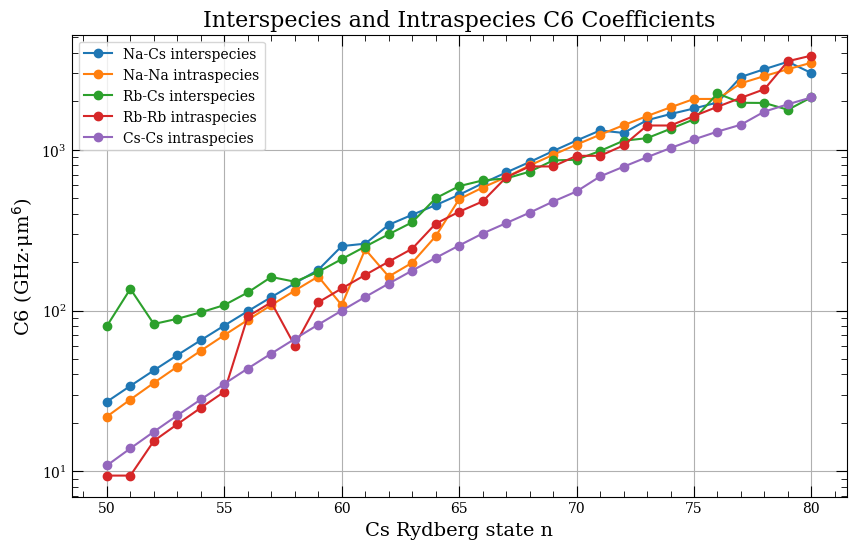

In [ ]:
# plot the interspecies and intraspecies C6 for each Cs state
plt.figure(figsize=(10,6))
plt.plot(Cs_states, np.array(max_C6_Na)/(2*np.pi*1e9), marker='o', label='Na-Cs interspecies')
plt.plot(Cs_states, np.array(C6_intra_Na)/(2*np.pi*1e9), marker='o', label='Na-Na intraspecies')
plt.plot(Cs_states, np.array(max_C6_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Cs interspecies')
plt.plot(Cs_states, np.array(C6_intra_Rb)/(2*np.pi*1e9), marker='o', label='Rb-Rb intraspecies')
plt.plot(Cs_states, np.array(C6_intra_Cs)/(2*np.pi*1e9), marker='o', label='Cs-Cs intraspecies')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("C6 (GHz·μm$^6$)", fontsize=14)
plt.title("Interspecies and Intraspecies C6 Coefficients", fontsize=16)
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

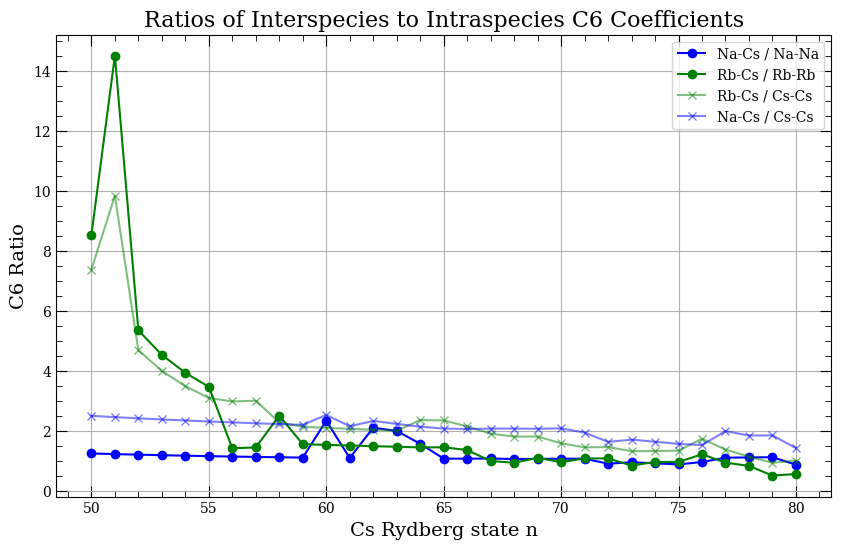

In [ ]:
# plot the ratios of interspecies to intraspecies C6 for each Cs state
plt.figure(figsize=(10,6))
plt.plot(Cs_states, np.array(max_C6_Na)/np.array(C6_intra_Na), marker='o', color='blue', label='Na-Cs / Na-Na')
plt.plot(Cs_states, np.array(max_C6_Rb)/np.array(C6_intra_Rb), marker='o', color='green', label='Rb-Cs / Rb-Rb')
plt.plot(Cs_states, np.array(max_C6_Rb)/np.array(C6_intra_Cs), marker='x', color='green', label='Rb-Cs / Cs-Cs', alpha = 0.5)
plt.plot(Cs_states, np.array(max_C6_Na)/np.array(C6_intra_Cs), marker='x', color='blue', label='Na-Cs / Cs-Cs', alpha = 0.5)
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("C6 Ratio", fontsize=14)
plt.title("Ratios of Interspecies to Intraspecies C6 Coefficients", fontsize=16)
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

# van der waals radius calc.


Calculating Hamiltonian matrix...


	matrix (dimension  968 )

Matrix R3 100.0 % (state 314 of 314)



Diagonalizing interaction matrix...

98%Data points to fit =  50
Rvdw =   10.323554980094348  mu m
offset =  -1.6133269636590166e-06 
 scale =  -5.5994081402066485


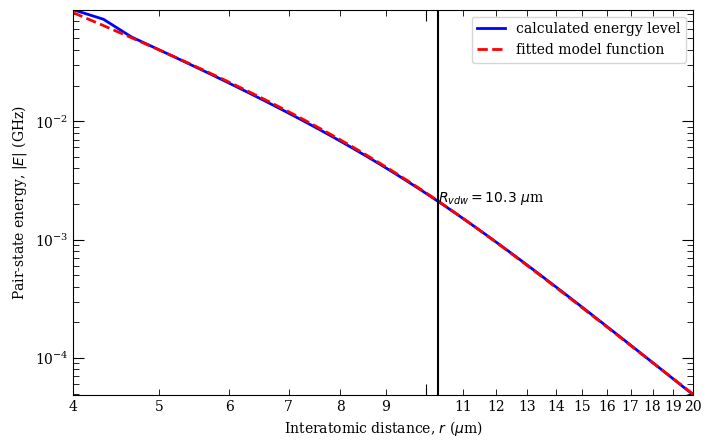

10.323554980094348


In [62]:
# check the C6 coefficient value with exact diagonalization using ARC
atom1 = Sodium()
atom2 = Cesium()
n_atom1 = 57
l_atom1 = 0
j_atom1 = 0.5
n_atom2 = 62
l_atom2 = 0
j_atom2 = 0.5


# Build inter-species pair-state calculation
calc = PairStateInteractions(
    atom1, n_atom1, l_atom1, j_atom1,
    n_atom2, l_atom2, j_atom2,
    m1=0.5, m2=0.5, atom2=atom2
)
calc.defineBasis(0, 0, 5, 3, 25e9, progressOutput=True)
r = np.linspace(4, 20, 50)
calc.diagonalise(r, 100, progressOutput=True)
# calc.plotLevelDiagram()
# grab energy shift value for this distance
# energy_shift = calc.energyDelta / (2*np.pi*1e9)
# print(f"\nEnergy shift at 10 um (Rb {n_atom1}S - Cs {n_atom2}S) from exact diagonalization = {energy_shift:.3e} GHz")
# ARC returns C6 typically as frequency×μm^6 (e.g., GHz·μm^6). Convert to Hz·μm^6 then to rad/s·μm^6.
# c6_freq_um6 = calc.getC6fromLevelDiagram(9, 50, showPlot=True)
# c6_Hz_um6 = c6_freq_um6 * 1.0e9  # GHz -> Hz if needed by ARC version
# c6_rad_um6 = TWOPI * c6_Hz_um6   # Hz -> rad/s
# print(f"\nC6 (Rb {n_atom1}S - Cs {n_atom2}S) from exact diagonalization = {c6_rad_um6:.3e} rad/s·μm^6")
# print("C6 (Rb %dS - Cs %dS) from exact diagonalization = %.3f GHz·μm^6" % (n_atom1, n_atom2, c6_rad_um6 / (2*np.pi*1e9)))
vdw_r = calc.getVdwFromLevelDiagram(4, 20, showPlot=True)
print(vdw_r)

# print(f"\nC6 (Na {n_atom1}S - Cs {n_atom2}S) from exact diagonalization = {c6_rad_um6:.3e} rad/s·μm^6")
# print("C6 (Na %dS - Cs %dS) from exact diagonalization = %.3f GHz·μm^6" % (n_atom1, n_atom2, c6_rad_um6 / (2*np.pi*1e9)))

# now calculating energy difference at 10 um

### first testing.

In [46]:
# check the C6 coefficient value with exact diagonalization using ARC
atom1 = Sodium()
atom2 = Cesium()
n_atom1 = 51
l_atom1 = 0
j_atom1 = 0.5
n_atom2 = 54
l_atom2 = 0
j_atom2 = 0.5

# Build inter-species pair-state calculation
calc = PairStateInteractions(
    atom1, n_atom1, l_atom1, j_atom1,
    n_atom2, l_atom2, j_atom2,
    m1=0.5, m2=0.5, atom2=atom2
)
calc.defineBasis(0, 0, 5, 3, 25e9, progressOutput=True)

R_um = 5
calc.diagonalise([R_um], 200, progressOutput=True)

# find state with highest overlap with target state
j = np.argmax(np.abs(calc.highlight[0]))
print("shift at", R_um, "um =", calc.y[0][j], "GHz")


Calculating Hamiltonian matrix...


	matrix (dimension  635 )

Matrix R3 100.0 % (state 209 of 209)



Diagonalizing interaction matrix...

0%shift at 5 um = 0.002404184121078445 GHz


In [49]:
def calc_energy_shift(cfg: ExperimentConfig, R_um: float) -> float:
    atom1 = cfg.atom1
    n_atom1 = cfg.n_atom1
    l_atom1 = cfg.l_atom1
    j_atom1 = cfg.j_atom1
    atom2 = cfg.atom2
    n_atom2 = cfg.n_atom2
    l_atom2 = cfg.l_atom2
    j_atom2 = cfg.j_atom2

    # Build inter-species pair-state calculation
    calc = PairStateInteractions(
        atom1, n_atom1, l_atom1, j_atom1,
        n_atom2, l_atom2, j_atom2,
        m1=0.5, m2=0.5, atom2=atom2
    )
    calc.defineBasis(0, 0, 5, 3, 25e9, progressOutput=True)

    calc.diagonalise([R_um], 100, progressOutput=True)

    # find state with highest overlap with target state
    j = np.argmax(np.abs(calc.highlight[0]))
    energy_shift_GHz = calc.y[0][j]
    return energy_shift_GHz


Calculating Hamiltonian matrix...


	matrix (dimension  384 )

Matrix R3 100.0 % (state 136 of 136)



Diagonalizing interaction matrix...

0%
Calculating Hamiltonian matrix...


	matrix (dimension  439 )

Matrix R3 100.0 % (state 150 of 150)



Diagonalizing interaction matrix...

0%
Calculating Hamiltonian matrix...


	matrix (dimension  348 )

Matrix R3 100.0 % (state 120 of 120)



Diagonalizing interaction matrix...

0%
Calculating Hamiltonian matrix...


	matrix (dimension  430 )

Matrix R3 100.0 % (state 142 of 142)



Diagonalizing interaction matrix...

0%
Calculating Hamiltonian matrix...


	matrix (dimension  430 )

Matrix R3 100.0 % (state 143 of 143)



Diagonalizing interaction matrix...

0%
Calculating Hamiltonian matrix...


	matrix (dimension  457 )

Matrix R3 100.0 % (state 152 of 152)



Diagonalizing interaction matrix...

0%
Calculating Hamiltonian matrix...


	matrix (dimension  463 )

Matrix R3 100.0 % (state 155 of 155)



Diagonalizing interaction matrix...

0

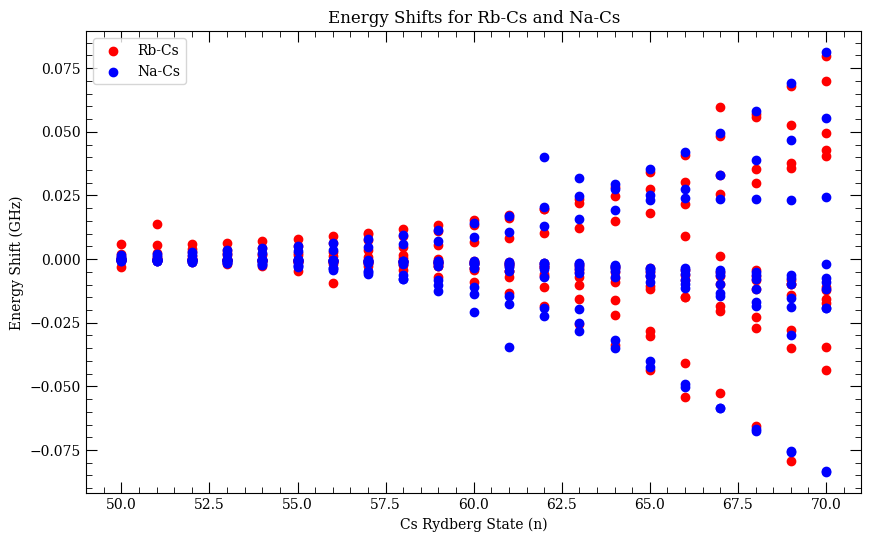

In [50]:
# perform sweep over states for Rb-Cs and Na-Cs at R = 5 um
Cs_states = np.linspace(50, 70, 21, dtype=int)  # n=50 to 70
energy_shifts_RbCs = []
energy_shifts_NaCs = []
for i in range(len(Cs_states)):
    Rb_states = np.linspace(Cs_states[i]-5, Cs_states[i]+5, 11, dtype=int)
    Na_states = np.linspace(Cs_states[i]-5, Cs_states[i]+5, 11, dtype=int)
    for Rb_state in Rb_states:
        cfg_temp = ExperimentConfig(
            atom1 = Rubidium(),
            mass_atom1 = Rubidium().mass,
            n_atom1 = Rb_state,  # Rb Rydberg n

            atom2 = Cesium(),
            mass_atom2 = Cesium().mass,
            n_atom2 = Cs_states[i],  # Cs Rydberg n
        )
        energy_shift = calc_energy_shift(cfg_temp, R_um=5)
        energy_shifts_RbCs.append(energy_shift)
    for Na_state in Na_states:
        cfg_temp = ExperimentConfig(
            atom1 = Sodium(),
            mass_atom1 = Sodium().mass,
            n_atom1 = Na_state,  # Na Rydberg n

            atom2 = Cesium(),
            mass_atom2 = Cesium().mass,
            n_atom2 = Cs_states[i],  # Cs Rydberg n
        )
        energy_shift = calc_energy_shift(cfg_temp, R_um=5)
        energy_shifts_NaCs.append(energy_shift)

# plot energy shifts for Rb-Cs and Na-Cs
plt.figure(figsize=(10,6))
plt.scatter(np.repeat(Cs_states, 11), energy_shifts_RbCs, color='red', label='Rb-Cs')
plt.scatter(np.repeat(Cs_states, 11), energy_shifts_NaCs, color='blue', label='Na-Cs')
plt.xlabel('Cs Rydberg State (n)')
plt.ylabel('Energy Shift (GHz)')
plt.title('Energy Shifts for Rb-Cs and Na-Cs')
plt.legend()
plt.show()

In [51]:
# create a new txt file and save the arrays of data to it (add data and time to each file)
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Create a new text file with a unique name
file_name = f"energy_shifts_{now.strftime('%Y%m%d_%H%M%S')}.txt"
with open(file_name, 'w') as f:
    f.write("Cs Rydberg State (n), Rb-Cs Energy Shift (GHz), Na-Cs Energy Shift (GHz)\n")
    for i in range(len(Cs_states)):
        for j in range(11):
            f.write(f"{Cs_states[i]}, {energy_shifts_RbCs[i*11+j]}, {energy_shifts_NaCs[i*11+j]}\n")



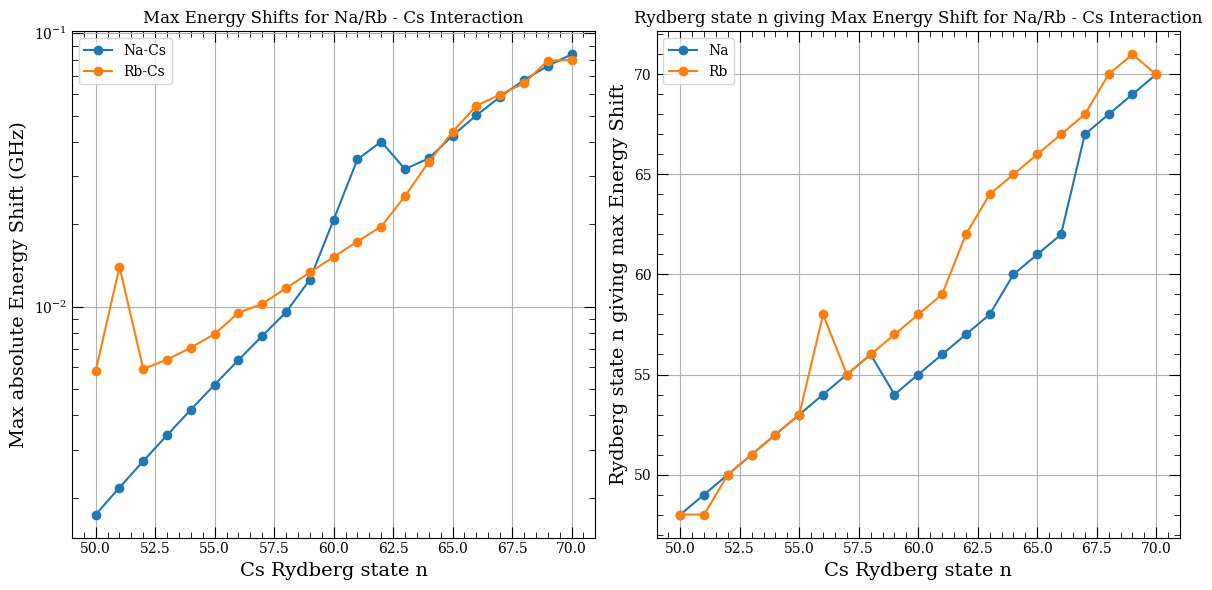

In [60]:
# plot the max energy shifts for each Cs state for Na and Rb
# find the max energy shifts for each Cs state
max_energy_shifts_RbCs = []
max_energy_shifts_NaCs = []
for i in range(len(Cs_states)):
    Rb_shifts = energy_shifts_RbCs[i*11:(i+1)*11]
    Na_shifts = energy_shifts_NaCs[i*11:(i+1)*11]
    max_energy_shifts_RbCs.append(np.max(np.abs(Rb_shifts)))
    max_energy_shifts_NaCs.append(np.max(np.abs(Na_shifts)))

# plot the max energy shifts and the corresponding Na and Rb states on a different plot side by side
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(Cs_states, max_energy_shifts_NaCs, marker='o', label='Na-Cs')
plt.plot(Cs_states, max_energy_shifts_RbCs, marker='o', label='Rb-Cs')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("Max absolute Energy Shift (GHz)", fontsize=14)
plt.title("Max Energy Shifts for Na/Rb - Cs Interaction")
plt.yscale('log')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
# find the n values that give the max energy shifts
max_n_Na_energy = []
max_n_Rb_energy = []
for i in range(len(Cs_states)):
    Rb_shifts = energy_shifts_RbCs[i*11:(i+1)*11]
    Na_shifts = energy_shifts_NaCs[i*11:(i+1)*11]
    Rb_states = np.linspace(Cs_states[i]-5, Cs_states[i]+5, 11, dtype=int)
    Na_states = np.linspace(Cs_states[i]-5, Cs_states[i]+5, 11, dtype=int)
    max_n_Rb_energy.append(Rb_states[np.abs(Rb_shifts).argmax()])
    max_n_Na_energy.append(Na_states[np.abs(Na_shifts).argmax()])
plt.plot(Cs_states, max_n_Na_energy, marker='o', label='Na')
plt.plot(Cs_states, max_n_Rb_energy, marker='o', label='Rb')
plt.xlabel("Cs Rydberg state n", fontsize=14)
plt.ylabel("Rydberg state n giving max Energy Shift", fontsize=14)
plt.title("Rydberg state n giving Max Energy Shift for Na/Rb - Cs Interaction")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

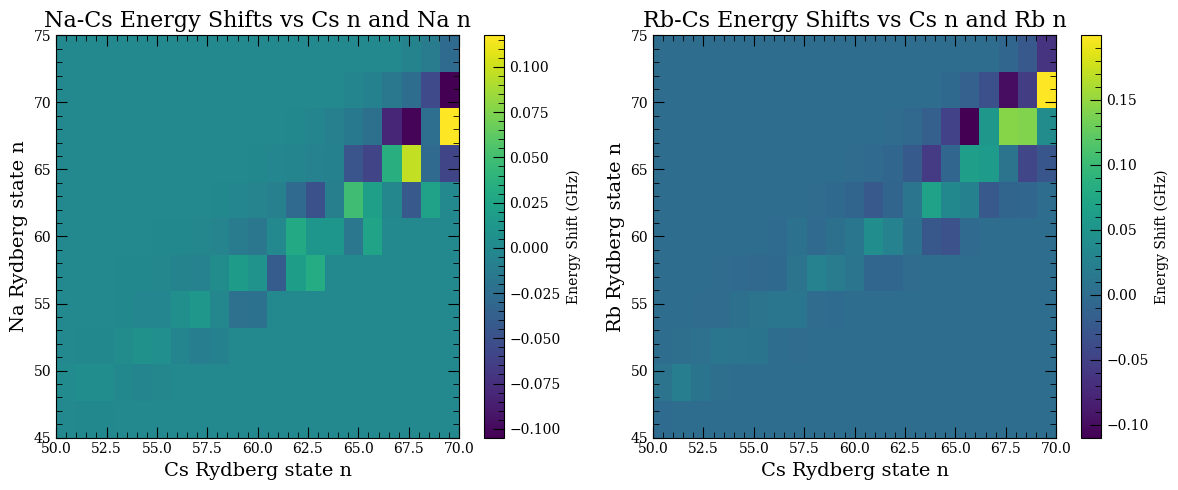

In [58]:
# make 2 2D histograms of energy shifts vs Cs n and Na/Rb n
# first for Na-Cs
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
Cs_n_vals_Na = []
Na_n_vals = []
energy_shift_vals_Na = []
for i in range(len(Cs_states)):
    Na_states = np.linspace(Cs_states[i]-5, Cs_states[i]+5, 11, dtype=int)
    for j in range(11):
        Cs_n_vals_Na.append(Cs_states[i])
        Na_n_vals.append(Na_states[j])
        energy_shift_vals_Na.append(energy_shifts_NaCs[i*11+j])
plt.hist2d(Cs_n_vals_Na, Na_n_vals, weights=energy_shift_vals_Na, bins=[len(Cs_states), 11])
plt.colorbar(label='Energy Shift (GHz)')
plt.xlabel('Cs Rydberg state n', fontsize=14)
plt.ylabel('Na Rydberg state n', fontsize=14)
plt.title('Na-Cs Energy Shifts vs Cs n and Na n', fontsize=16)

# now for Rb-Cs
plt.subplot(1, 2, 2)
Cs_n_vals_Rb = []
Rb_n_vals = []
energy_shift_vals_Rb = []
for i in range(len(Cs_states)):
    Rb_states = np.linspace(Cs_states[i]-5, Cs_states[i]+5, 11, dtype=int)
    for j in range(11):
        Cs_n_vals_Rb.append(Cs_states[i])
        Rb_n_vals.append(Rb_states[j])
        energy_shift_vals_Rb.append(energy_shifts_RbCs[i*11+j])
plt.hist2d(Cs_n_vals_Rb, Rb_n_vals, weights=energy_shift_vals_Rb, bins=[len(Cs_states), 11])
plt.colorbar(label='Energy Shift (GHz)')
plt.xlabel('Cs Rydberg state n', fontsize=14)
plt.ylabel('Rb Rydberg state n', fontsize=14)
plt.title('Rb-Cs Energy Shifts vs Cs n and Rb n', fontsize=16)
plt.tight_layout()
plt.show()

# Sweep squeezing


Simulating for squeeze factor = 0.50...
Starting detuning scan...


/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/Ni lab/two atom rydberg interaction/two_atom_interaction.py:326: RuntimeWarning: divide by zero encountered in scalar divide
  nbar = 1.0 / (np.exp(hbar * omega / (kB * temp)) - 1.0)


  Point 2/30 - Elapsed: 0.5s, Est. remaining: 7.0s
  Point 4/30 - Elapsed: 1.4s, Est. remaining: 8.8s
  Point 6/30 - Elapsed: 2.2s, Est. remaining: 8.7s
  Point 8/30 - Elapsed: 2.9s, Est. remaining: 8.1s
  Point 10/30 - Elapsed: 3.7s, Est. remaining: 7.3s
  Point 12/30 - Elapsed: 4.4s, Est. remaining: 6.5s
  Point 14/30 - Elapsed: 5.0s, Est. remaining: 5.7s
  Point 16/30 - Elapsed: 5.7s, Est. remaining: 4.9s
  Point 18/30 - Elapsed: 6.3s, Est. remaining: 4.2s
  Point 20/30 - Elapsed: 6.9s, Est. remaining: 3.5s
  Point 22/30 - Elapsed: 7.6s, Est. remaining: 2.8s
  Point 24/30 - Elapsed: 8.4s, Est. remaining: 2.1s
  Point 26/30 - Elapsed: 9.1s, Est. remaining: 1.4s
  Point 28/30 - Elapsed: 10.0s, Est. remaining: 0.7s
  Point 30/30 - Elapsed: 10.8s, Est. remaining: 0.0s
time for simulation: 11.3 s

Simulating for squeeze factor = 1.00...
Starting detuning scan...
  Point 2/30 - Elapsed: 0.5s, Est. remaining: 6.3s
  Point 4/30 - Elapsed: 1.3s, Est. remaining: 8.8s
  Point 6/30 - Elapsed: 2

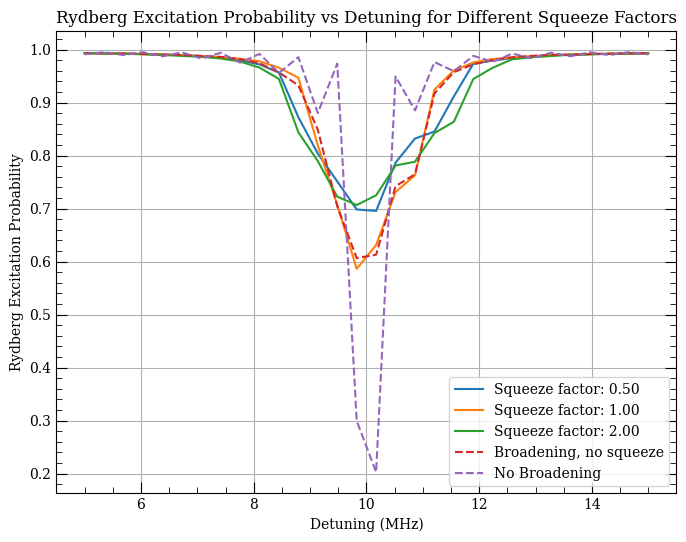

In [102]:
# first sweep for Rb squeezing
# sweep over squeezing factors and simulate interaction peak
squeeze_factors = np.array([0.5, 1.0, 2.0])# np.linspace(1.5, 2.5, 5) # np.array([0.5, 1.0, 2.0, 5.0]) #  np.arange(0.0, 5, 0.5) # np.linspace(1.5, 2.5, 10) # 
results = []

for factor in squeeze_factors:
    start_time = time.time()
    print(f"\nSimulating for squeeze factor = {factor:.2f}...")
    cfg.squeeze_factor1 = (factor, factor, 1.0)  # squeezing in (x, y, z) directions
    cfg.squeeze_factor2 = (factor, factor, 1.0)  # squeezing in (x, y, z) directions
    d, P = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    results.append((factor, d, P))
    print(f"time for simulation: {time.time() - start_time:.1f} s")

# Plot results
plt.figure(figsize=(8,6))
for factor, d, P in results:
    plt.plot(d/1e6, P, label=f"Squeeze factor: {factor:.2f}")

plt.plot(d / 1e6, P_int, '--', label='Broadening, no squeeze', markersize=5)
plt.plot(d / 1e6, P_no_broad, '--', label='No Broadening', markersize=5)
plt.xlabel("Detuning (MHz)")
plt.ylabel("Rydberg Excitation Probability")
plt.title("Rydberg Excitation Probability vs Detuning for Different Squeeze Factors")
plt.legend(loc='lower right')
plt.grid()
plt.show()


Simulating for squeeze factor = 1.50...
Starting detuning scan...
  Point 2/30 - Elapsed: 0.3s, Est. remaining: 3.9s
  Point 4/30 - Elapsed: 0.8s, Est. remaining: 5.5s
  Point 6/30 - Elapsed: 1.4s, Est. remaining: 5.6s
  Point 8/30 - Elapsed: 2.0s, Est. remaining: 5.4s
  Point 10/30 - Elapsed: 2.5s, Est. remaining: 5.0s
  Point 12/30 - Elapsed: 3.0s, Est. remaining: 4.6s
  Point 14/30 - Elapsed: 3.6s, Est. remaining: 4.1s
  Point 16/30 - Elapsed: 4.1s, Est. remaining: 3.6s
  Point 18/30 - Elapsed: 4.6s, Est. remaining: 3.1s
  Point 20/30 - Elapsed: 5.2s, Est. remaining: 2.6s
  Point 22/30 - Elapsed: 5.7s, Est. remaining: 2.1s
  Point 24/30 - Elapsed: 6.3s, Est. remaining: 1.6s
  Point 26/30 - Elapsed: 6.8s, Est. remaining: 1.1s
  Point 28/30 - Elapsed: 7.4s, Est. remaining: 0.5s
  Point 30/30 - Elapsed: 7.9s, Est. remaining: 0.0s
time for simulation: 8.3 s

Simulating for squeeze factor = 1.61...
Starting detuning scan...
  Point 2/30 - Elapsed: 0.3s, Est. remaining: 3.7s
  Point 4/30

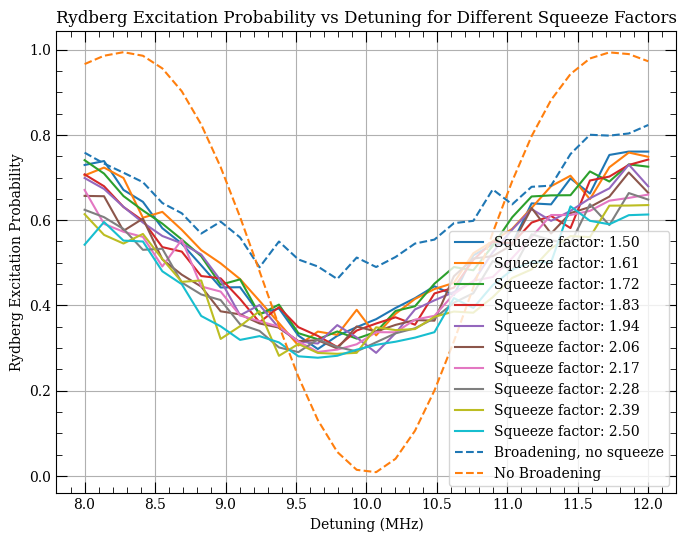

In [37]:
# now set Rb squeezing and sweep Cs squeezing
# sweep over squeezing factors and simulate interaction peak
squeeze_factors = np.linspace(1.5, 2.5, 10) # np.array([0.5, 1.0, 2.0, 5.0]) #  np.arange(0.0, 5, 0.5) #
results = []
cfg.squeeze_factor1 = (1.83, 1.83, 1.0)  # squeezing in (x, y, z) directions

for factor in squeeze_factors:
    start_time = time.time()
    print(f"\nSimulating for squeeze factor = {factor:.2f}...")
    cfg.squeeze_factor2 = (factor, factor, 1.0)  # squeezing in (x, y, z) directions
    d, P = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    results.append((factor, d, P))
    print(f"time for simulation: {time.time() - start_time:.1f} s")

# Plot results
plt.figure(figsize=(8,6))
for factor, d, P in results:
    plt.plot(d/1e6, P, label=f"Squeeze factor: {factor:.2f}")

plt.plot(d / 1e6, P_int, '--', label='Broadening, no squeeze', markersize=5)
plt.plot(d / 1e6, P_no_broad, '--', label='No Broadening', markersize=5)
plt.xlabel("Detuning (MHz)")
plt.ylabel("Rydberg Excitation Probability")
plt.title("Rydberg Excitation Probability vs Detuning for Different Squeeze Factors")
plt.legend(loc='lower right')
plt.grid()
plt.show()


Simulating for squeeze factor = 1.50...
Starting detuning scan...


/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/Ni lab/two atom rydberg interaction/two_atom_interaction.py:326: RuntimeWarning: divide by zero encountered in scalar divide
  nbar = 1.0 / (np.exp(hbar * omega / (kB * temp)) - 1.0)


  Point 2/30 - Elapsed: 0.4s, Est. remaining: 5.3s
  Point 4/30 - Elapsed: 1.0s, Est. remaining: 6.8s
  Point 6/30 - Elapsed: 1.7s, Est. remaining: 6.8s
  Point 8/30 - Elapsed: 2.3s, Est. remaining: 6.4s
  Point 10/30 - Elapsed: 3.0s, Est. remaining: 5.9s
  Point 12/30 - Elapsed: 3.6s, Est. remaining: 5.4s
  Point 14/30 - Elapsed: 4.2s, Est. remaining: 4.8s
  Point 16/30 - Elapsed: 4.8s, Est. remaining: 4.2s
  Point 18/30 - Elapsed: 5.4s, Est. remaining: 3.6s
  Point 20/30 - Elapsed: 6.0s, Est. remaining: 3.0s
  Point 22/30 - Elapsed: 6.7s, Est. remaining: 2.4s
  Point 24/30 - Elapsed: 7.3s, Est. remaining: 1.8s
  Point 26/30 - Elapsed: 8.0s, Est. remaining: 1.2s
  Point 28/30 - Elapsed: 8.6s, Est. remaining: 0.6s
  Point 30/30 - Elapsed: 9.3s, Est. remaining: 0.0s
time for simulation: 9.7 s

Simulating for squeeze factor = 1.61...
Starting detuning scan...
  Point 2/30 - Elapsed: 0.3s, Est. remaining: 4.7s
  Point 4/30 - Elapsed: 1.0s, Est. remaining: 6.5s
  Point 6/30 - Elapsed: 1.7s

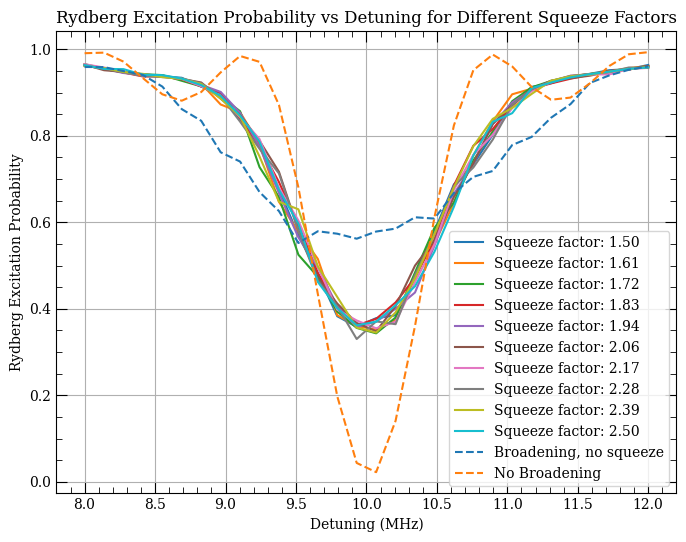

In [27]:
# axial squeezing sweep Rb
# sweep over squeezing factors and simulate interaction peak
squeeze_factors = np.linspace(1.5, 2.5, 10) # np.array([0.5, 1.0, 2.0, 5.0]) #  np.arange(0.0, 5, 0.5) #
results = []

cfg.squeeze_factor2 = (1.83, 1.83, 1.0)  # squeezing in (x, y, z) directions

for factor in squeeze_factors:
    start_time = time.time()
    print(f"\nSimulating for squeeze factor = {factor:.2f}...")
    cfg.squeeze_factor1 = (2.39, 2.39, factor)  # squeezing in (x, y, z) directions
    d, P = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    results.append((factor, d, P))
    print(f"time for simulation: {time.time() - start_time:.1f} s")

# Plot results
plt.figure(figsize=(8,6))
for factor, d, P in results:
    plt.plot(d/1e6, P, label=f"Squeeze factor: {factor:.2f}")

plt.plot(d / 1e6, P_int, '--', label='Broadening, no squeeze', markersize=5)
plt.plot(d / 1e6, P_no_broad, '--', label='No Broadening', markersize=5)
plt.xlabel("Detuning (MHz)")
plt.ylabel("Rydberg Excitation Probability")
plt.title("Rydberg Excitation Probability vs Detuning for Different Squeeze Factors")
plt.legend(loc='lower right')
plt.grid()
plt.show()  


Simulating for squeeze factor = 1.50...
Starting detuning scan...


/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/Ni lab/two atom rydberg interaction/two_atom_interaction.py:326: RuntimeWarning: divide by zero encountered in scalar divide
  nbar = 1.0 / (np.exp(hbar * omega / (kB * temp)) - 1.0)


  Point 2/30 - Elapsed: 0.4s, Est. remaining: 5.3s
  Point 4/30 - Elapsed: 1.1s, Est. remaining: 7.2s
  Point 6/30 - Elapsed: 1.8s, Est. remaining: 7.0s
  Point 8/30 - Elapsed: 2.4s, Est. remaining: 6.6s
  Point 10/30 - Elapsed: 3.0s, Est. remaining: 6.1s
  Point 12/30 - Elapsed: 3.7s, Est. remaining: 5.5s
  Point 14/30 - Elapsed: 4.3s, Est. remaining: 4.9s
  Point 16/30 - Elapsed: 4.9s, Est. remaining: 4.3s
  Point 18/30 - Elapsed: 5.6s, Est. remaining: 3.7s
  Point 20/30 - Elapsed: 6.2s, Est. remaining: 3.1s
  Point 22/30 - Elapsed: 6.8s, Est. remaining: 2.5s
  Point 24/30 - Elapsed: 7.4s, Est. remaining: 1.9s
  Point 26/30 - Elapsed: 8.1s, Est. remaining: 1.2s
  Point 28/30 - Elapsed: 8.7s, Est. remaining: 0.6s
  Point 30/30 - Elapsed: 9.4s, Est. remaining: 0.0s
time for simulation: 9.7 s

Simulating for squeeze factor = 1.61...
Starting detuning scan...
  Point 2/30 - Elapsed: 0.3s, Est. remaining: 4.7s
  Point 4/30 - Elapsed: 1.0s, Est. remaining: 6.4s
  Point 6/30 - Elapsed: 1.7s

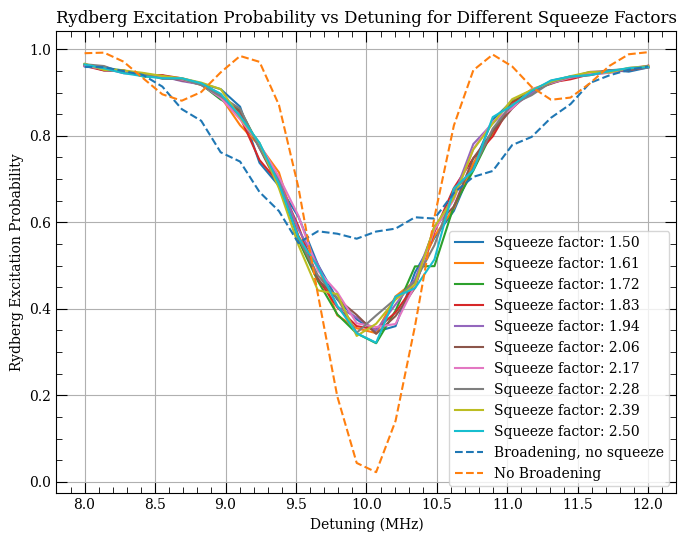

In [28]:
# axial squeezing sweep Cs
# sweep over squeezing factors and simulate interaction peak
squeeze_factors = np.linspace(1.5, 2.5, 10) # np.array([0.5, 1.0, 2.0, 5.0]) #  np.arange(0.0, 5, 0.5) #
results = []

cfg.squeeze_factor1 = (2.39, 2.39, 2.28)  # squeezing in (x, y, z) directions

for factor in squeeze_factors:
    start_time = time.time()
    print(f"\nSimulating for squeeze factor = {factor:.2f}...")
    cfg.squeeze_factor2 = (1.83, 1.83, factor)  # squeezing in (x, y, z) directions
    d, P = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    results.append((factor, d, P))
    print(f"time for simulation: {time.time() - start_time:.1f} s")

# Plot results
plt.figure(figsize=(8,6))
for factor, d, P in results:
    plt.plot(d/1e6, P, label=f"Squeeze factor: {factor:.2f}")

plt.plot(d / 1e6, P_int, '--', label='Broadening, no squeeze', markersize=5)
plt.plot(d / 1e6, P_no_broad, '--', label='No Broadening', markersize=5)
plt.xlabel("Detuning (MHz)")
plt.ylabel("Rydberg Excitation Probability")
plt.title("Rydberg Excitation Probability vs Detuning for Different Squeeze Factors")
plt.legend(loc='lower right')
plt.grid()
plt.show()  